In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *
import itertools

In [2]:
# Load data for all years into a single DataFrame
file_names = [
    f'../../data/IKA_trades_{year}_c1_partial.csv' if year == 2023
    else f'../../data/IKA_trades_{year}_c1.csv'
    for year in range(2010, 2024)
]
anomalous_days = ["2014-05-26", "2015-02-17", "2015-07-20", "2016-07-14", "2018-03-16", "2020-01-22", "2022-08-29", "2023-07-24"]

all_data = pd.concat([pd.read_csv(file) for file in file_names])
all_data['Date-Time'] = pd.to_datetime(all_data['Date-Time'])
all_data.set_index('Date-Time',inplace=True)
all_data.drop('Price', axis=1,inplace=True)
all_data.shape

for a in anomalous_days:
    all_data = all_data[all_data.index.date != datetime.strptime(a, "%Y-%m-%d").date()]

In [3]:
all_data.shape

(1981896, 1)

In [4]:
print(all_data.head())
print(all_data.tail())

                            Volume
Date-Time                         
2010-01-04 08:12:59.078443       2
2010-01-04 08:17:49.495088       5
2010-01-04 08:22:59.325993       1
2010-01-04 08:23:37.135183       1
2010-01-04 08:48:36.458491       1
                            Volume
Date-Time                         
2023-08-31 18:55:59.298322      28
2023-08-31 18:56:49.634197      18
2023-08-31 18:57:17.713820       2
2023-08-31 18:58:33.934043       5
2023-08-31 18:59:58.068485      70


In [5]:
all_data_daily_sum = all_data.resample('D').sum()

In [6]:
all_data_daily_sum.head()

Volume
Date-Time         
2010-01-04    1449
2010-01-05    1791
2010-01-06    1165
2010-01-07    1111
2010-01-08    3028

In [7]:
# Slicing the data based on relevant dates
relevant_dates = [
    "2010-03-08", "2010-06-08", "2010-09-08", "2010-12-08",
    "2011-03-08", "2011-06-08", "2011-09-08", "2011-12-08",
    "2012-03-08", "2012-06-07", "2012-09-06", "2012-12-06",
    "2013-03-07", "2013-06-06", "2013-09-06", "2013-12-06",
    "2014-03-06", "2014-06-06", "2014-09-08", "2014-12-08",
    "2015-03-06", "2015-06-08", "2015-09-08", "2015-12-08",
    "2016-03-08", "2016-06-08", "2016-09-08", "2016-12-08",
    "2017-03-08", "2017-06-08", "2017-09-07", "2017-12-07",
    "2018-03-08", "2018-06-07", "2018-09-06", "2018-12-06",
    "2019-03-07", "2019-06-06", "2019-09-06", "2019-12-06",
    "2020-03-06", "2020-06-08", "2020-09-08", "2020-12-08",
    "2021-03-08", "2021-06-08", "2021-09-08", "2021-12-08",
    "2022-03-08", "2022-06-08", "2022-09-08", "2022-12-08",
    "2023-03-08", "2023-06-08", "2023-09-07", "2023-12-07",
]

relevant_dates = pd.to_datetime(relevant_dates)

datasets = {}
time_1230 = datetime.strptime('12:30', '%H:%M').time()

for i in range(len(relevant_dates) - 1):
    if (i==0):
        datasets[f"dataset_{(datetime.combine(relevant_dates[i], time_1230)).strftime('%Y-%m-%d')}"] = all_data.loc[(all_data.index < datetime.combine(relevant_dates[i], time_1230))]
    else:
        datasets[f"dataset_{(datetime.combine(relevant_dates[i], time_1230)).strftime('%Y-%m-%d')}"] = all_data.loc[(all_data.index >= datetime.combine(relevant_dates[i-1], time_1230)) &
                                                (all_data.index < datetime.combine(relevant_dates[i], time_1230))]

# Print a sample of each dataset
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    print(dataset.head())
    print(dataset.tail())
    print("------------------------------")

Dataset: dataset_2010-03-08
                            Volume
Date-Time                         
2010-01-04 08:12:59.078443       2
2010-01-04 08:17:49.495088       5
2010-01-04 08:22:59.325993       1
2010-01-04 08:23:37.135183       1
2010-01-04 08:48:36.458491       1
                            Volume
Date-Time                         
2010-03-08 12:20:54.636322      33
2010-03-08 12:23:22.866614       4
2010-03-08 12:24:30.107418      20
2010-03-08 12:28:54.698661     102
2010-03-08 12:29:44.535661     156
------------------------------
Dataset: dataset_2010-06-08
                            Volume
Date-Time                         
2010-03-08 12:33:07.971038      25
2010-03-08 12:34:04.200898      12
2010-03-08 12:35:20.987704       5
2010-03-08 12:38:28.331883       1
2010-03-08 12:41:00.222487      53
                            Volume
Date-Time                         
2010-06-08 12:13:35.434539     229
2010-06-08 12:18:37.525784       6
2010-06-08 12:24:24.001181      13
201

---Volumes for dataset_2010-03-08---
Q1: 2.00
Median: 10.00
Q3: 27.00
---Volumes for dataset_2010-06-08---
Q1: 2.00
Median: 8.00
Q3: 23.00
---Volumes for dataset_2010-09-08---
Q1: 3.00
Median: 8.00
Q3: 21.00
---Volumes for dataset_2010-12-08---
Q1: 3.00
Median: 9.00
Q3: 23.00
---Volumes for dataset_2011-03-08---
Q1: 3.00
Median: 10.00
Q3: 25.00
---Volumes for dataset_2011-06-08---
Q1: 3.00
Median: 10.00
Q3: 27.00
---Volumes for dataset_2011-09-08---
Q1: 4.00
Median: 12.00
Q3: 30.00
---Volumes for dataset_2011-12-08---
Q1: 4.00
Median: 11.00
Q3: 28.00
---Volumes for dataset_2012-03-08---
Q1: 4.00
Median: 11.00
Q3: 29.00
---Volumes for dataset_2012-06-07---
Q1: 5.00
Median: 16.00
Q3: 39.00
---Volumes for dataset_2012-09-06---
Q1: 6.00
Median: 18.00
Q3: 44.00
---Volumes for dataset_2012-12-06---
Q1: 6.00
Median: 17.00
Q3: 43.00
---Volumes for dataset_2013-03-07---
Q1: 9.00
Median: 27.00
Q3: 69.00
---Volumes for dataset_2013-06-06---
Q1: 10.00
Median: 30.00
Q3: 71.00
---Volumes for dataset

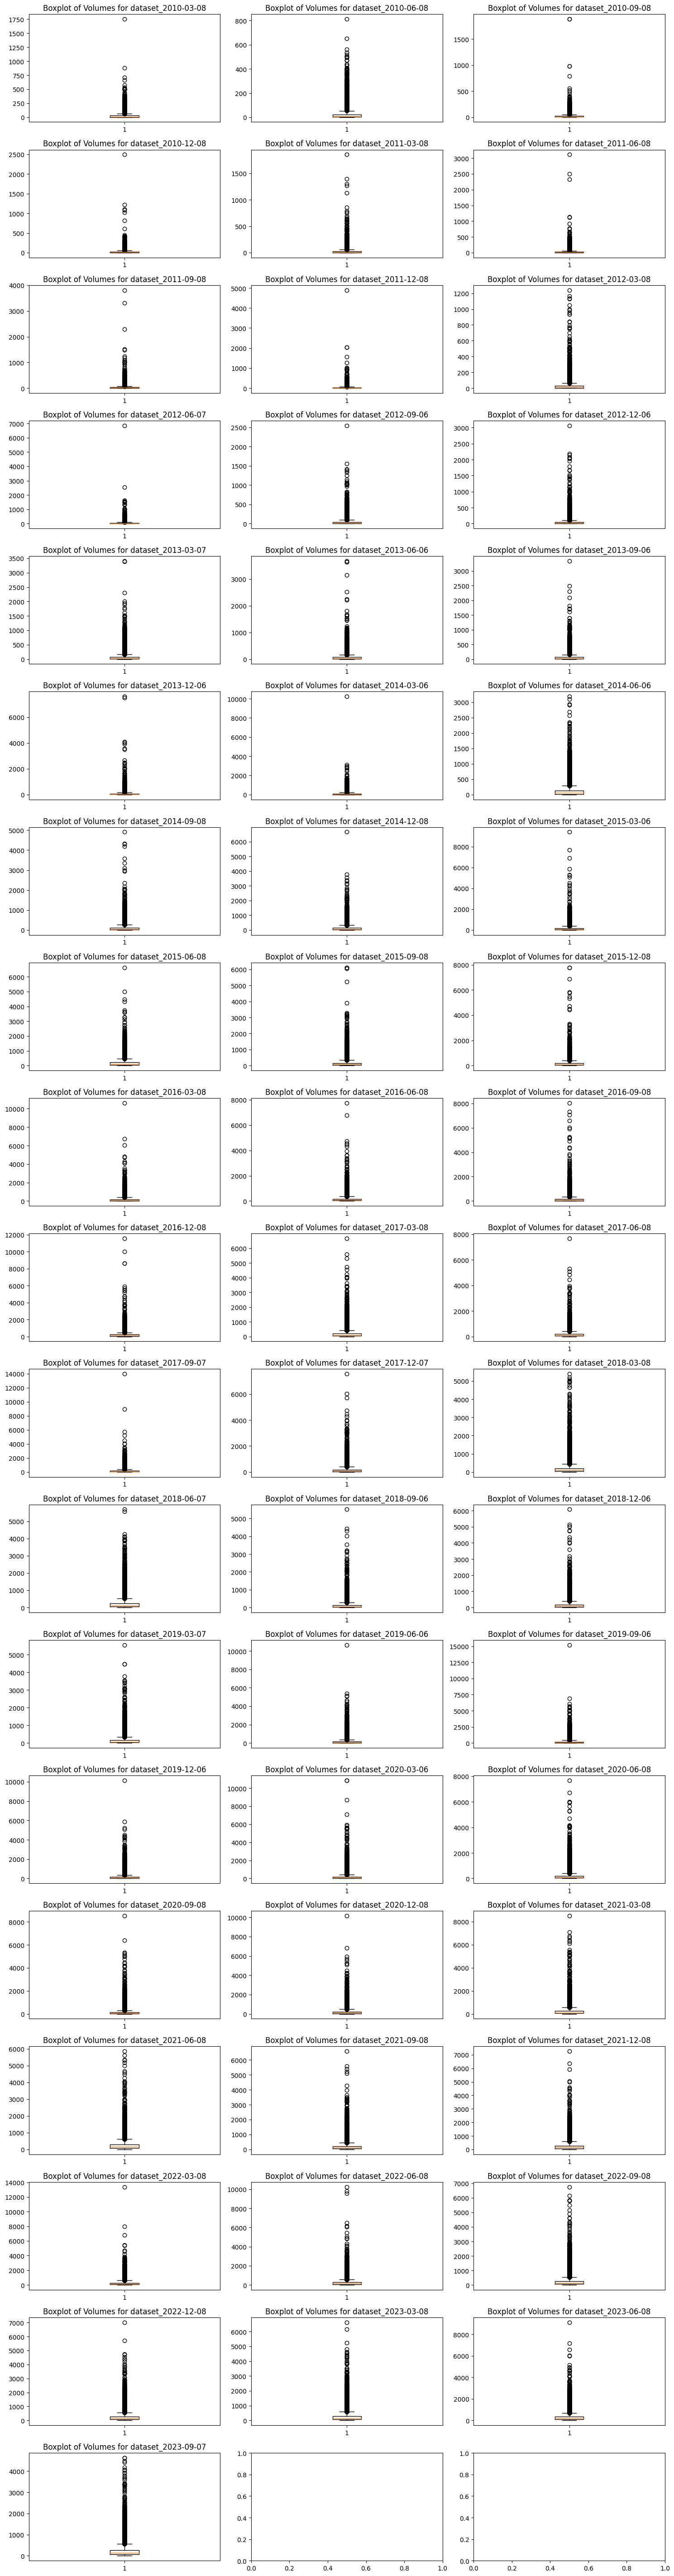

In [8]:
# Let's inspect volumes distribution for each dataset
num_plots = len(datasets)
plots_per_row = 3
num_rows = -(-num_plots // plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))

i = 0
for name, dataset in datasets.items():
    print(f'---Volumes for {name}---')
    print(f'Q1: {dataset["Volume"].describe()["25%"]:.2f}')
    print(f'Median: {dataset["Volume"].describe()["50%"]:.2f}')
    print(f'Q3: {dataset["Volume"].describe()["75%"]:.2f}')
    
    ax = axes[i // plots_per_row, i % plots_per_row] if num_rows > 1 else axes[i % plots_per_row]
    ax.boxplot(dataset)
    ax.set_title(f'Boxplot of Volumes for {name}')
    #dataset.boxplot(column='Volume')  
    #plt.title(f'Boxplot of Volumes for {name}')
    #plt.xlabel('Dataset')
    #plt.ylabel('Volume')
    i+=1

plt.tight_layout()   
plt.show()

---Volumes for dataset_2010-03-08---
Q1: 6.00
Median: 20.00
Q3: 47.50
---Volumes for dataset_2010-06-08---
Q1: 13.00
Median: 26.00
Q3: 43.00
---Volumes for dataset_2010-09-08---
Q1: 1.50
Median: 2.00
Q3: 6.50
---Volumes for dataset_2010-12-08---
Q1: 2.00
Median: 5.00
Q3: 10.00
---Volumes for dataset_2011-03-08---
Q1: 9.50
Median: 15.50
Q3: 32.75
---Volumes for dataset_2011-06-08---
Q1: 9.00
Median: 11.00
Q3: 21.00
---Volumes for dataset_2011-09-08---
Q1: 5.00
Median: 7.00
Q3: 12.00
---Volumes for dataset_2011-12-08---
Q1: 3.50
Median: 9.00
Q3: 32.75
---Volumes for dataset_2012-03-08---
Q1: 2.50
Median: 7.00
Q3: 10.00
---Volumes for dataset_2012-06-07---
Q1: 5.00
Median: 19.00
Q3: 60.00
---Volumes for dataset_2012-09-06---
Q1: 4.00
Median: 9.00
Q3: 12.75
---Volumes for dataset_2012-12-06---
Q1: 9.25
Median: 40.00
Q3: 63.50
---Volumes for dataset_2013-03-07---
Q1: 5.00
Median: 9.50
Q3: 29.00
---Volumes for dataset_2013-06-06---
Q1: 1.00
Median: 8.00
Q3: 19.75
---Volumes for dataset_2013-

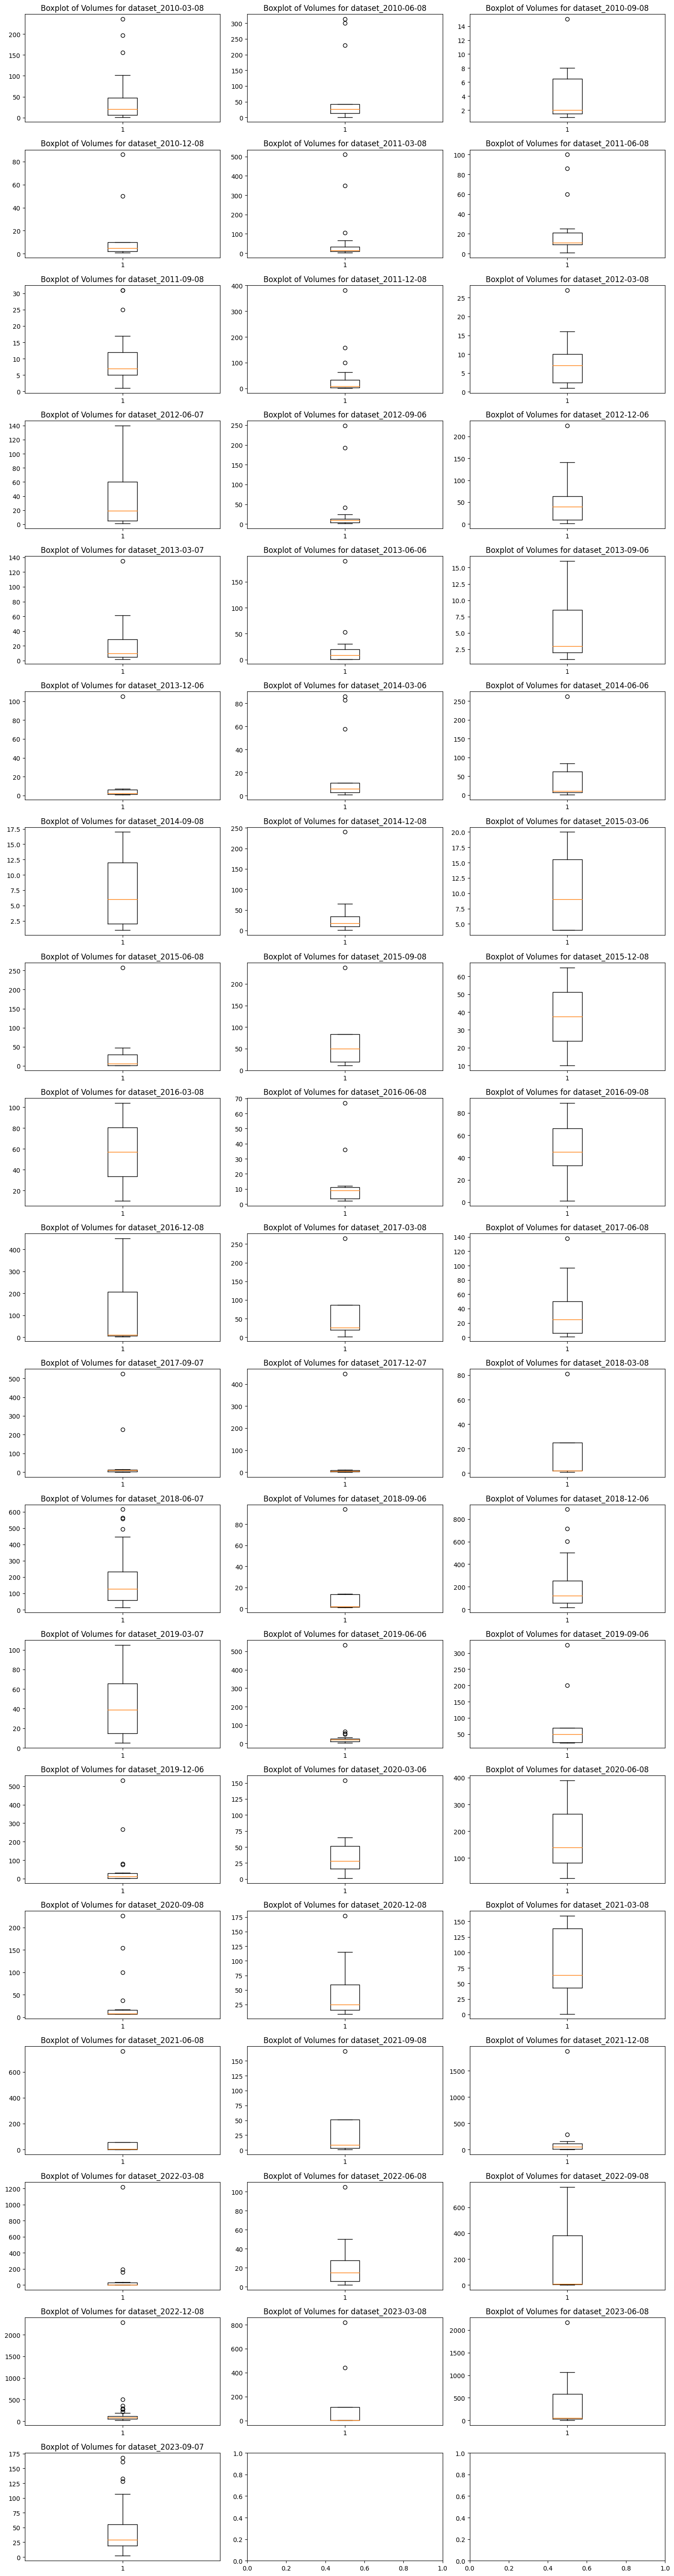

In [9]:
# Let's inspect volumes distribution of each dataset considering only last hour before the rolling date
num_plots = len(datasets)
plots_per_row = 3
num_rows = -(-num_plots // plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))

i = 0
for name, dataset in datasets.items():
    last_date = dataset.index[-1]
    
    start_last_hour = last_date - timedelta(hours=1)
    
    last_hour_data = dataset[(dataset.index >= start_last_hour) & (dataset.index <= last_date)]
    
    print(f'---Volumes for {name}---')
    print(f'Q1: {last_hour_data["Volume"].describe()["25%"]:.2f}')
    print(f'Median: {last_hour_data["Volume"].describe()["50%"]:.2f}')
    print(f'Q3: {last_hour_data["Volume"].describe()["75%"]:.2f}')
    
    ax = axes[i // plots_per_row, i % plots_per_row] if num_rows > 1 else axes[i % plots_per_row]
    ax.boxplot(last_hour_data)
    ax.set_title(f'Boxplot of Volumes for {name}')
    i+=1

plt.tight_layout()   
plt.show()

---Volumes for dataset_2010-03-08---
Q1: 7.75
Median: 15.00
Q3: 50.25
---Volumes for dataset_2010-06-08---
Q1: 13.00
Median: 21.00
Q3: 34.00
---Volumes for dataset_2010-09-08---
Q1: 3.00
Median: 5.00
Q3: 10.00
---Volumes for dataset_2010-12-08---
Q1: 4.25
Median: 6.00
Q3: 20.00
---Volumes for dataset_2011-03-08---
Q1: 7.75
Median: 17.00
Q3: 49.00
---Volumes for dataset_2011-06-08---
Q1: 8.75
Median: 12.50
Q3: 66.50
---Volumes for dataset_2011-09-08---
Q1: 5.00
Median: 6.50
Q3: 9.25
---Volumes for dataset_2011-12-08---
Q1: 4.00
Median: 20.00
Q3: 52.00
---Volumes for dataset_2012-03-08---
Q1: 1.00
Median: 3.00
Q3: 8.75
---Volumes for dataset_2012-06-07---
Q1: 21.00
Median: 60.00
Q3: 80.00
---Volumes for dataset_2012-09-06---
Q1: 4.00
Median: 9.00
Q3: 14.50
---Volumes for dataset_2012-12-06---
Q1: 13.00
Median: 43.50
Q3: 83.75
---Volumes for dataset_2013-03-07---
Q1: 5.00
Median: 6.00
Q3: 27.00
---Volumes for dataset_2013-06-06---
Q1: 10.50
Median: 17.00
Q3: 35.50
---Volumes for dataset_2

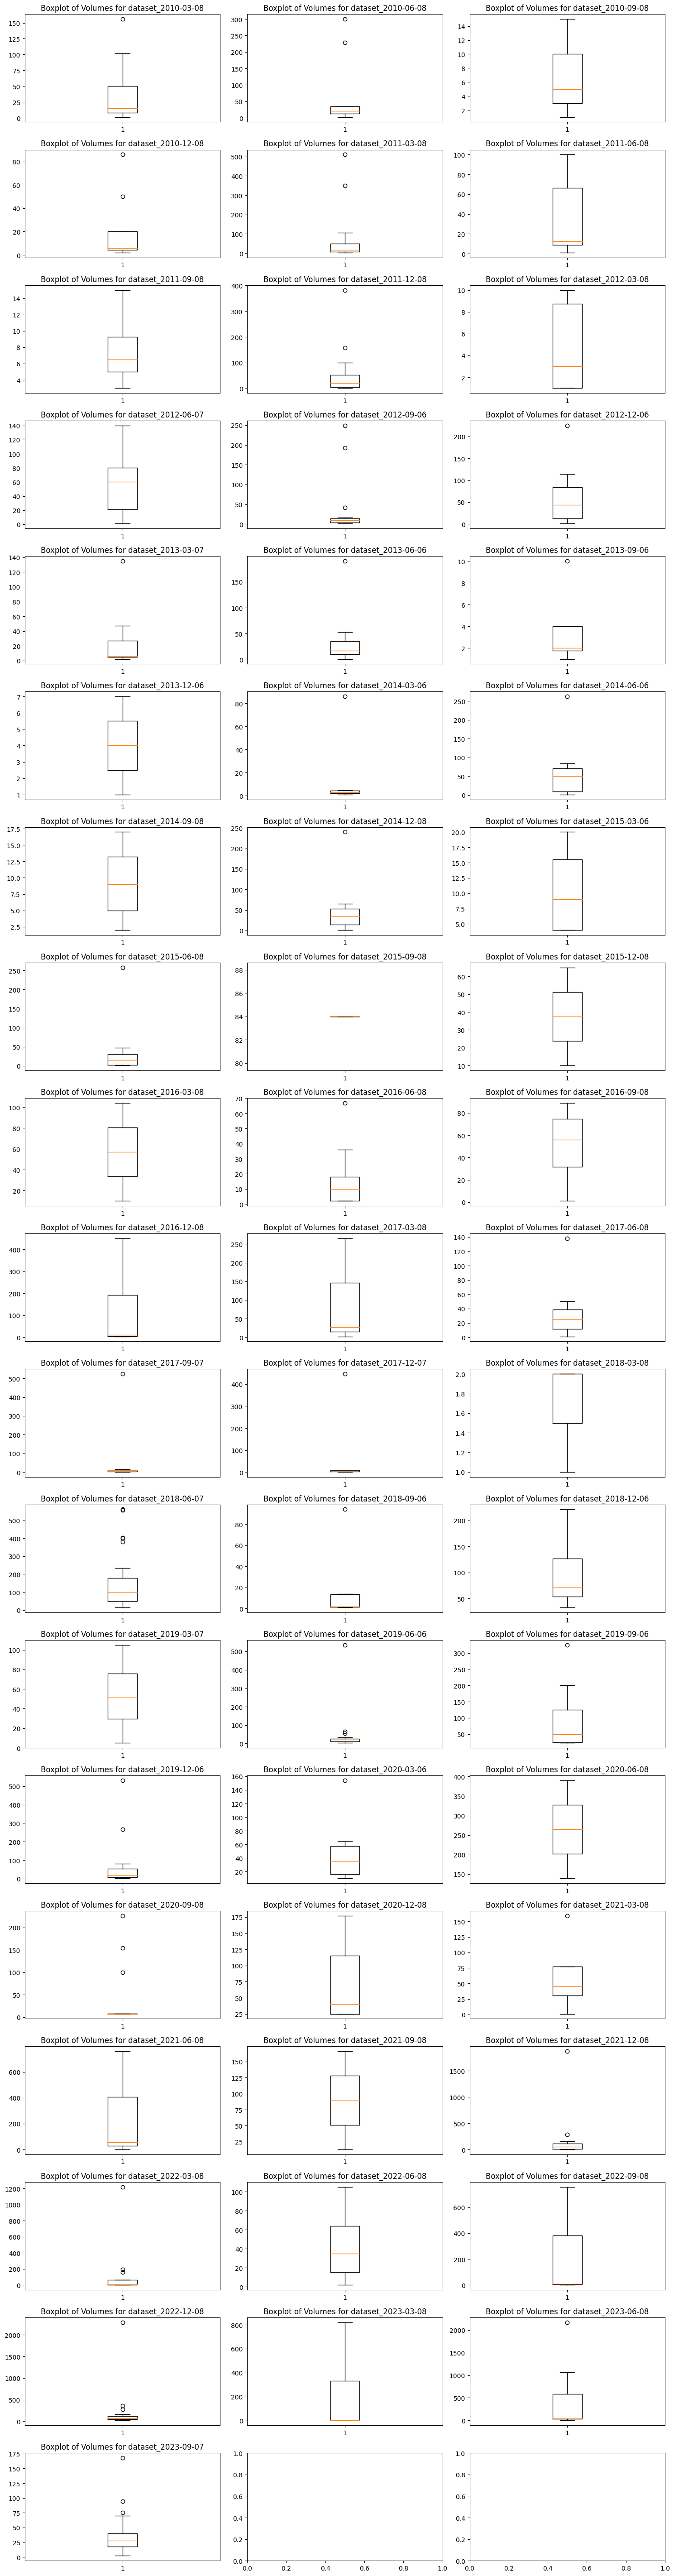

In [10]:
# Let's inspect volumes distribution of each dataset considering only last 30 minutes before the rolling date
num_plots = len(datasets)
plots_per_row = 3
num_rows = -(-num_plots // plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))

i = 0
for name, dataset in datasets.items():
    last_date = dataset.index[-1]
    
    start_last_30min = last_date - timedelta(minutes=30)
    
    last_30min_data = dataset[(dataset.index >= start_last_30min) & (dataset.index <= last_date)]
    
    print(f'---Volumes for {name}---')
    print(f'Q1: {last_30min_data["Volume"].describe()["25%"]:.2f}')
    print(f'Median: {last_30min_data["Volume"].describe()["50%"]:.2f}')
    print(f'Q3: {last_30min_data["Volume"].describe()["75%"]:.2f}')
    
    ax = axes[i // plots_per_row, i % plots_per_row] if num_rows > 1 else axes[i % plots_per_row]
    ax.boxplot(last_30min_data)
    ax.set_title(f'Boxplot of Volumes for {name}')
    i+=1

plt.tight_layout()   
plt.show()

---Volumes for dataset_2010-03-08---
Q1: 20.00
Median: 33.00
Q3: 102.00
---Volumes for dataset_2010-06-08---
Q1: 5.00
Median: 9.50
Q3: 16.25
---Volumes for dataset_2010-09-08---
Q1: 1.00
Median: 1.00
Q3: 1.00
---Volumes for dataset_2010-12-08---
Q1: 5.00
Median: 5.00
Q3: 7.00
---Volumes for dataset_2011-03-08---
Q1: 6.25
Median: 12.50
Q3: 45.00
---Volumes for dataset_2011-06-08---
Q1: 6.25
Median: 8.50
Q3: 9.50
---Volumes for dataset_2011-09-08---
Q1: 3.75
Median: 5.00
Q3: 6.25
---Volumes for dataset_2011-12-08---
Q1: 11.25
Median: 37.00
Q3: 51.50
---Volumes for dataset_2012-03-08---
Q1: 1.00
Median: 1.00
Q3: 3.00
---Volumes for dataset_2012-06-07---
Q1: 45.00
Median: 60.00
Q3: 90.00
---Volumes for dataset_2012-09-06---
Q1: 9.00
Median: 9.50
Q3: 12.25
---Volumes for dataset_2012-12-06---
Q1: 10.00
Median: 25.00
Q3: 113.00
---Volumes for dataset_2013-03-07---
Q1: 5.50
Median: 6.00
Q3: 18.50
---Volumes for dataset_2013-06-06---
Q1: 17.75
Median: 35.50
Q3: 87.25
---Volumes for dataset_201

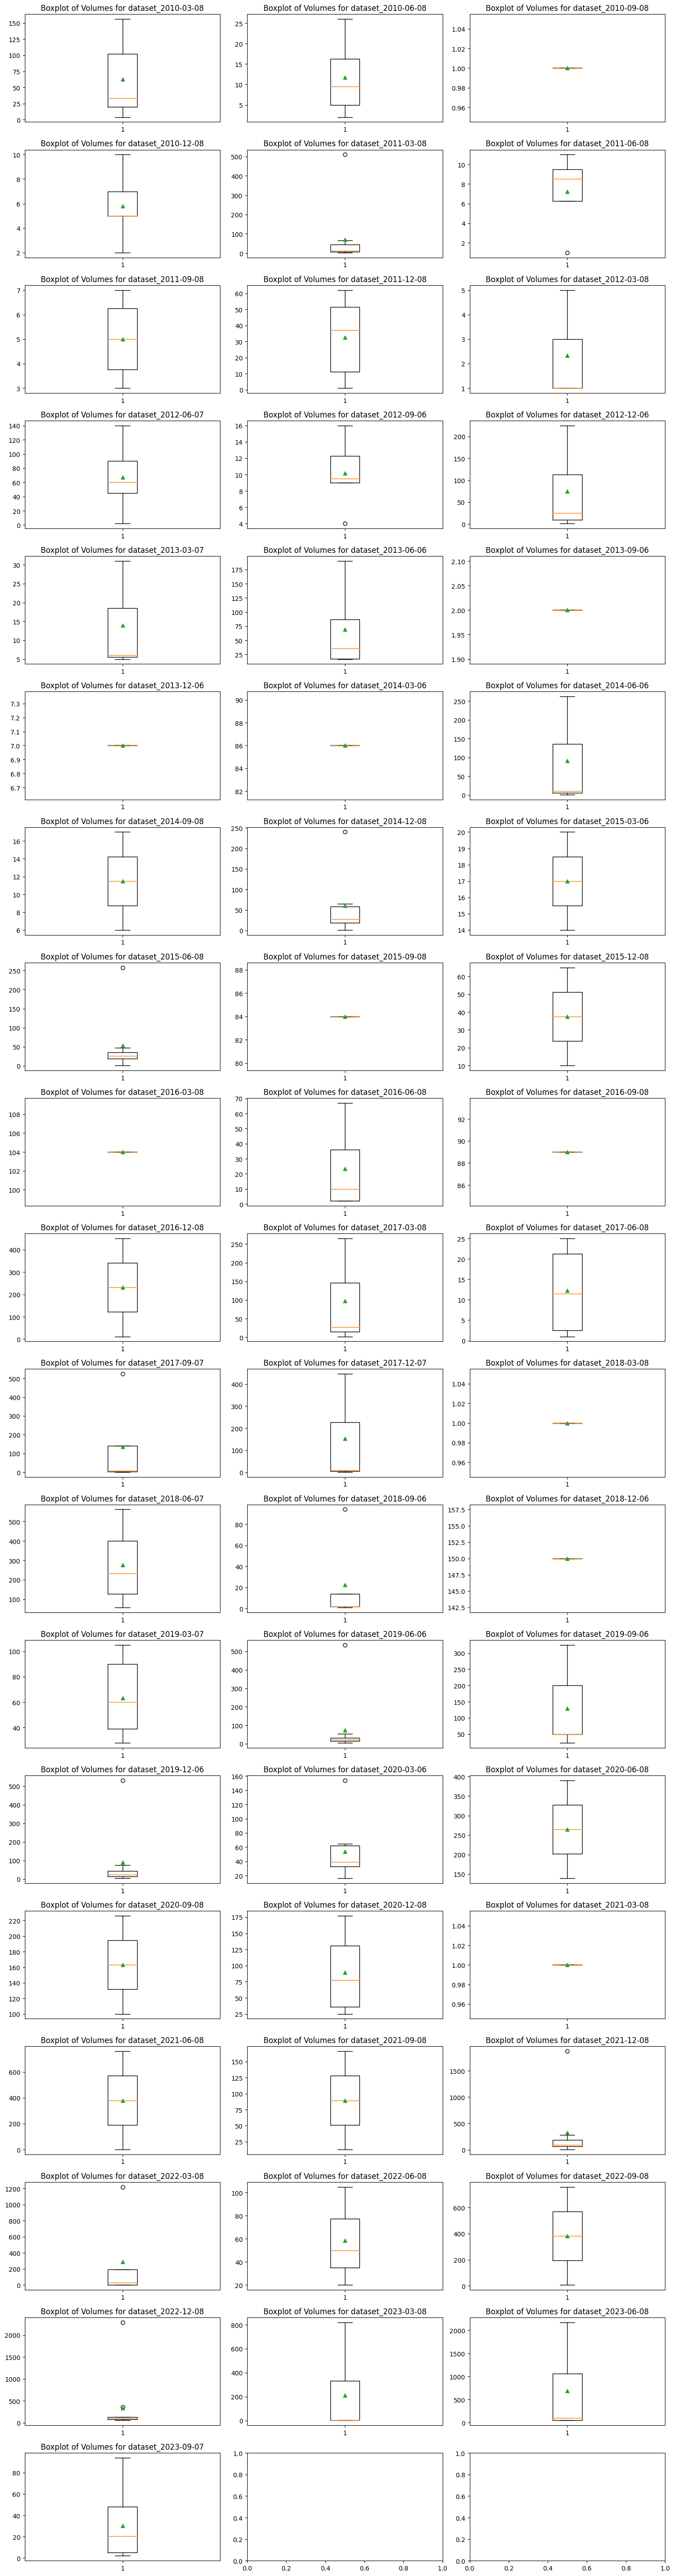

In [11]:
# Let's inspect volumes distribution of each dataset considering only last 10 minutes before the rolling date
num_plots = len(datasets)
plots_per_row = 3
num_rows = -(-num_plots // plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))

i = 0
for name, dataset in datasets.items():
    last_date = dataset.index[-1]
    
    start_last_10min = last_date - timedelta(minutes=10)
    
    last_10min_data = dataset[(dataset.index >= start_last_10min) & (dataset.index <= last_date)]
    
    print(f'---Volumes for {name}---')
    print(f'Q1: {last_10min_data["Volume"].describe()["25%"]:.2f}')
    print(f'Median: {last_10min_data["Volume"].describe()["50%"]:.2f}')
    print(f'Q3: {last_10min_data["Volume"].describe()["75%"]:.2f}')
    
    ax = axes[i // plots_per_row, i % plots_per_row] if num_rows > 1 else axes[i % plots_per_row]
    ax.boxplot(last_10min_data,showmeans=True)
    ax.set_title(f'Boxplot of Volumes for {name}')
    i+=1

plt.tight_layout()   
plt.show()

---Volumes for dataset_2010-03-08---
Q1: 115.50
Median: 129.00
Q3: 142.50
---Volumes for dataset_2010-06-08---
Q1: 7.50
Median: 13.00
Q3: 19.50
---Volumes for dataset_2010-09-08---
Q1: 1.00
Median: 1.00
Q3: 1.00
---Volumes for dataset_2010-12-08---
Q1: 6.00
Median: 7.00
Q3: 8.50
---Volumes for dataset_2011-03-08---
Q1: 5.00
Median: 13.00
Q3: 65.00
---Volumes for dataset_2011-06-08---
Q1: 4.50
Median: 8.00
Q3: 8.50
---Volumes for dataset_2011-09-08---
Q1: 3.50
Median: 4.00
Q3: 5.00
---Volumes for dataset_2011-12-08---
Q1: 26.50
Median: 52.00
Q3: 57.00
---Volumes for dataset_2012-03-08---
Q1: 1.00
Median: 1.00
Q3: 3.00
---Volumes for dataset_2012-06-07---
Q1: 55.00
Median: 60.00
Q3: 70.00
---Volumes for dataset_2012-09-06---
Q1: 9.50
Median: 10.00
Q3: 13.00
---Volumes for dataset_2012-12-06---
Q1: 7.75
Median: 17.50
Q3: 47.00
---Volumes for dataset_2013-03-07---
Q1: 5.50
Median: 6.00
Q3: 18.50
---Volumes for dataset_2013-06-06---
Q1: 87.25
Median: 121.50
Q3: 155.75
---Volumes for dataset

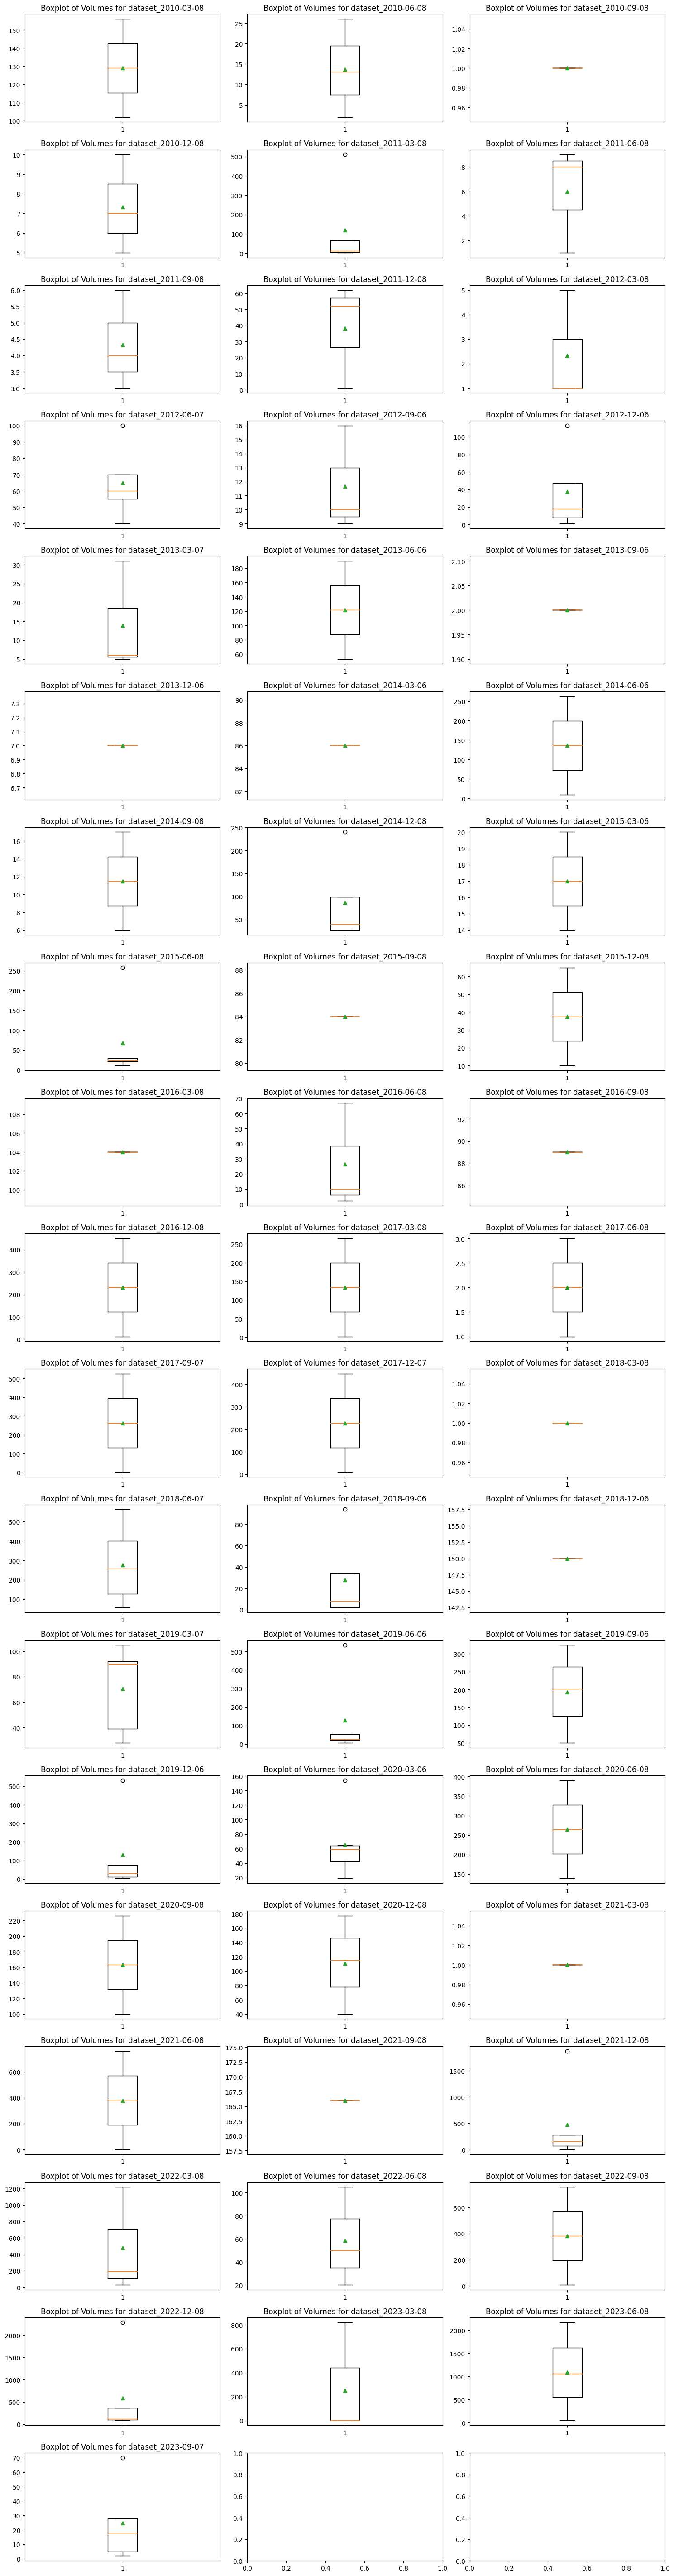

In [12]:
# Let's inspect volumes distribution of each dataset considering only last 5 minutes before the rolling date
num_plots = len(datasets)
plots_per_row = 3
num_rows = -(-num_plots // plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))

i = 0
for name, dataset in datasets.items():
    last_date = dataset.index[-1]
    
    start_last_5min = last_date - timedelta(minutes=5)
    
    last_5min_data = dataset[(dataset.index >= start_last_5min) & (dataset.index <= last_date)]
    
    print(f'---Volumes for {name}---')
    print(f'Q1: {last_5min_data["Volume"].describe()["25%"]:.2f}')
    print(f'Median: {last_5min_data["Volume"].describe()["50%"]:.2f}')
    print(f'Q3: {last_5min_data["Volume"].describe()["75%"]:.2f}')
    
    ax = axes[i // plots_per_row, i % plots_per_row] if num_rows > 1 else axes[i % plots_per_row]
    ax.boxplot(last_5min_data, showmeans=True)
    ax.set_title(f'Boxplot of Volumes for {name}')
    i+=1

plt.tight_layout()   
plt.show()

In [13]:
# Let's create 1 minute before, 2 minutes before (etc...) datasets
df_by_interval = []
time_intervals = [1,2,5,10,30,60,120,240]
relevant_dates_12_30 = [datetime.combine(relevant_dates[i],time_1230) for i in range(len(relevant_dates))] 

for interval in time_intervals:
    dict_values = pd.DataFrame()
    i = 0
    for dataset in datasets.values():
        cur_relevant_date = relevant_dates_12_30[i]
        time_before_last_date = cur_relevant_date - timedelta(minutes=interval)
        
        if time_before_last_date in dataset.index:
            dict_values = dict_values._append(dataset.loc[time_before_last_date])
        else:
            # Find the closest timestamps before
            closest_before = dataset.index[dataset.index < time_before_last_date][-1]
            dict_values = dict_values._append(dataset.loc[closest_before])
        i+=1

    df_by_interval.append(dict_values)

In [14]:
for val in df_by_interval:
    print(val.head())

                            Volume
2010-03-08 12:28:54.698661     102
2010-06-08 12:27:46.382513      26
2010-09-08 12:17:51.892467       1
2010-12-08 12:28:47.472743       5
2011-03-08 12:28:33.782809       5
                            Volume
2010-03-08 12:24:30.107418      20
2010-06-08 12:27:46.382513      26
2010-09-08 12:17:51.892467       1
2010-12-08 12:27:56.623144       7
2011-03-08 12:27:42.354129      65
                            Volume
2010-03-08 12:24:30.107418      20
2010-06-08 12:24:24.001181      13
2010-09-08 12:17:51.892467       1
2010-12-08 12:24:37.446506       5
2011-03-08 12:24:35.430485      12
                            Volume
2010-03-08 12:16:31.714863       9
2010-06-08 12:18:37.525784       6
2010-09-08 12:17:51.892467       1
2010-12-08 12:19:07.701619      50
2011-03-08 12:15:39.526224     350
                            Volume
2010-03-08 11:59:54.403022       1
2010-06-08 11:57:57.701011      21
2010-09-08 11:52:23.732321       5
2010-12-08 11:47:21.

Q1: 5.00
Median: 14.00
Q3: 64.00


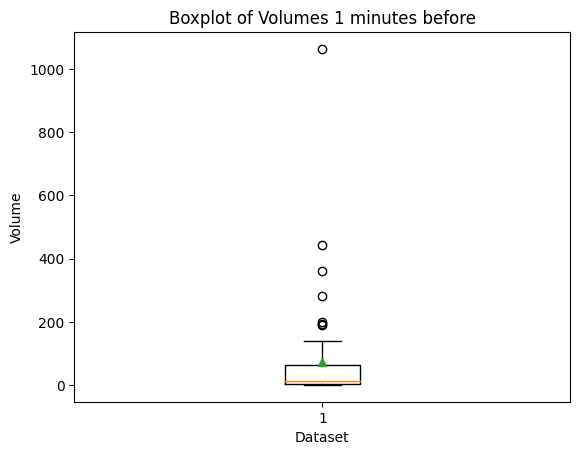

Q1: 2.00
Median: 13.00
Q3: 39.00


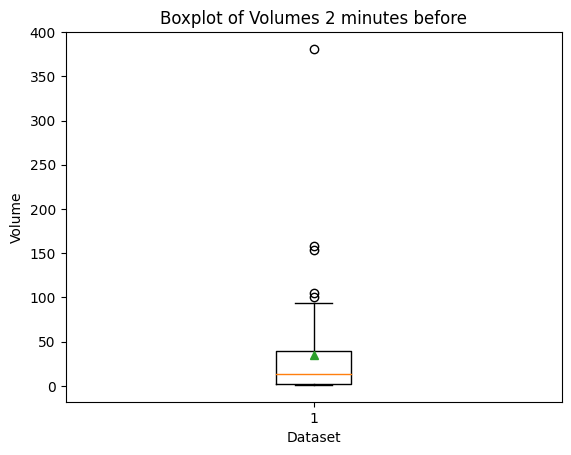

Q1: 2.00
Median: 10.00
Q3: 30.50


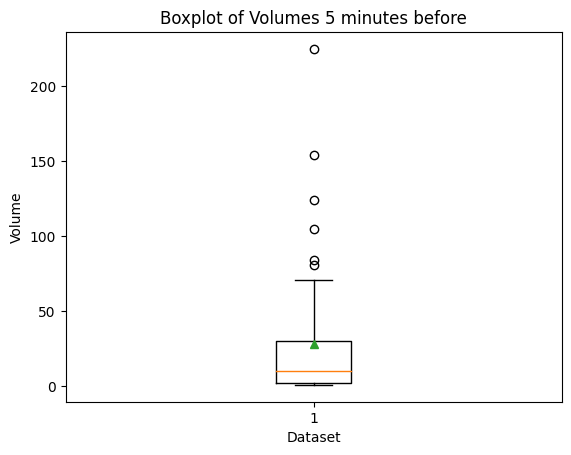

Q1: 1.50
Median: 10.00
Q3: 25.00


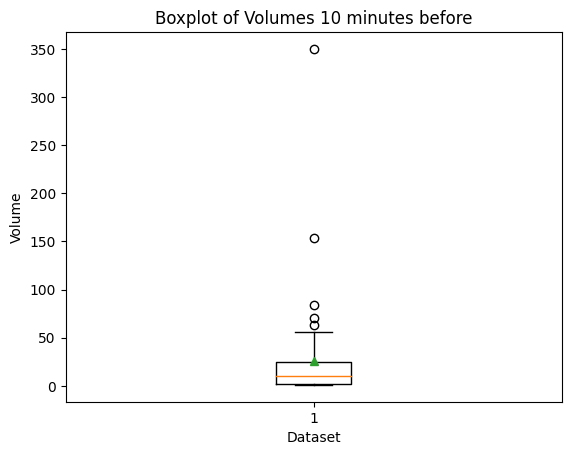

Q1: 2.00
Median: 9.00
Q3: 25.00


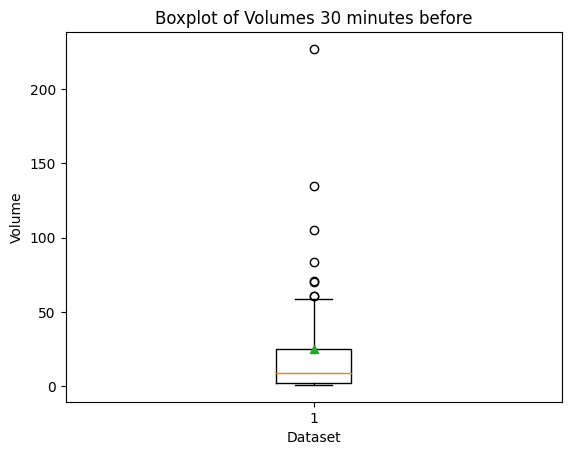

Q1: 3.00
Median: 11.00
Q3: 29.00


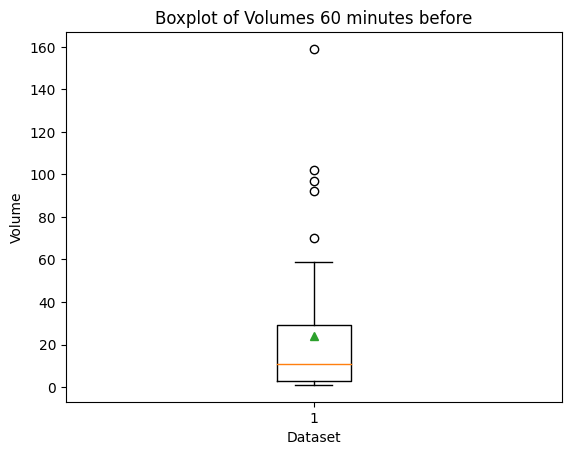

Q1: 3.00
Median: 13.00
Q3: 25.00


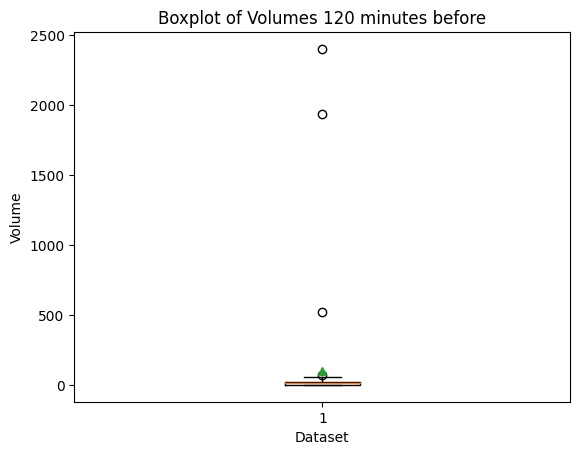

Q1: 1.00
Median: 3.00
Q3: 10.00


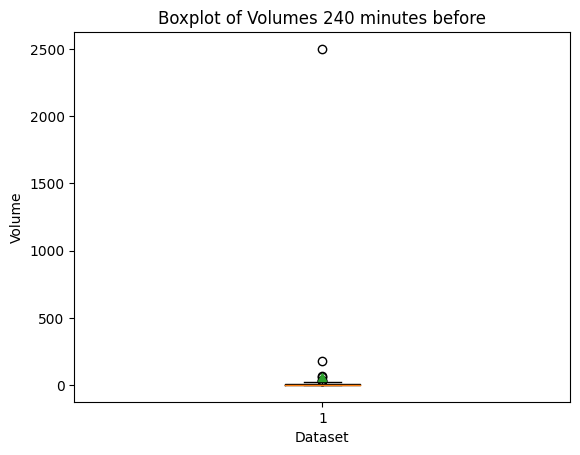

In [15]:
time_intervals = [1,2,5,10,30,60,120,240]
i = 0
for df in df_by_interval:
    print(f'Q1: {df["Volume"].describe()["25%"]:.2f}')
    print(f'Median: {df["Volume"].describe()["50%"]:.2f}')
    print(f'Q3: {df["Volume"].describe()["75%"]:.2f}')
    
    plt.boxplot(df['Volume'], showmeans=True)
    
    plt.title(f'Boxplot of Volumes {time_intervals[i]} minutes before')
    plt.xlabel('Dataset')
    plt.ylabel('Volume')
    
    plt.show()
    i+=1

In [16]:
"""
This section divide the initial dataset into different ones considering days right before relevant dates,
in this case we consider specific days and not all the interval: 
    the first dataset contains all data of last day before relevant dates,
    the second dataset contains all data of the day two days before relevant dates,
    and so on up to 1 week before.
    
relevant_dates = [
    "2010-03-08", "2010-06-08", "2010-09-08", "2010-12-08",
    "2011-03-08", "2011-06-08", "2011-09-08", "2011-12-08",
    "2012-03-08", "2012-06-07", "2012-09-06", "2012-12-06",
    "2013-03-07", "2013-06-06", "2013-09-06", "2013-12-06",
    "2014-03-06", "2014-06-06", "2014-09-08", "2014-12-08",
    "2015-03-06", "2015-06-08", "2015-09-08", "2015-12-08",
    "2016-03-08", "2016-06-08", "2016-09-08", "2016-12-08",
    "2017-03-08", "2017-06-08", "2017-09-07", "2017-12-07",
    "2018-03-08", "2018-06-07", "2018-09-06", "2018-12-06",
    "2019-03-07", "2019-06-06", "2019-09-06", "2019-12-06",
    "2020-03-06", "2020-06-08", "2020-09-08", "2020-12-08",
    "2021-03-08", "2021-06-08", "2021-09-08", "2021-12-08",
    "2022-03-08", "2022-06-08", "2022-09-08", "2022-12-08",
    "2023-03-08", "2023-06-08", "2023-09-07", "2023-12-07",
]

"""
business_days_before = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
datasets_by_days = [pd.DataFrame() for i in range(len(business_days_before))]

for date in relevant_dates:
    specific_day_dataset = pd.DataFrame()
    for business_day in range(len(business_days_before)):
        target_date_day = (pd.to_datetime(date) - pd.offsets.BDay(business_days_before[business_day])).date()
        specific_day_data = all_data[all_data.index.date == target_date_day]
        datasets_by_days[business_day] = datasets_by_days[business_day]._append(specific_day_data)


In [17]:
for dataset in datasets_by_days:
    print(dataset.head())
    print(dataset.tail())

                            Volume
Date-Time                         
2010-03-05 08:11:13.462128       1
2010-03-05 08:19:48.244711       2
2010-03-05 08:37:16.246953       1
2010-03-05 08:40:07.088601       2
2010-03-05 08:46:59.443908     205
                            Volume
Date-Time                         
2023-06-07 18:06:40.186363       1
2023-06-07 18:20:44.235590       2
2023-06-07 18:40:55.071174       5
2023-06-07 18:41:10.321241       2
2023-06-07 18:48:18.461121      18
                            Volume
Date-Time                         
2010-03-04 08:09:57.794521       1
2010-03-04 08:10:47.742285       3
2010-03-04 08:11:14.390605      50
2010-03-04 08:13:57.242193       1
2010-03-04 08:17:21.164307       1
                            Volume
Date-Time                         
2023-06-06 18:56:28.830592       8
2023-06-06 18:57:53.821315       5
2023-06-06 18:58:09.061422       1
2023-06-06 18:59:56.085701      14
2023-06-06 19:00:00.075585       2
                    

In [18]:
for df in datasets_by_days:
    print(df.groupby(df.index.date).sum().head())

            Volume
2010-03-05    6390
2010-06-07    5722
2010-09-07    9786
2010-12-07    8588
2011-03-07    8103
            Volume
2010-03-04   11692
2010-06-04   11690
2010-09-06    6157
2010-12-06   14075
2011-03-04   12495
            Volume
2010-03-03    8459
2010-06-03    9113
2010-09-03    4146
2010-12-03    9339
2011-03-03   15300
            Volume
2010-03-02   10303
2010-06-02    7211
2010-09-02    3723
2010-12-02   10114
2011-03-02    8446
            Volume
2010-03-01    6844
2010-06-01    5594
2010-09-01    4902
2010-12-01   11370
2011-03-01    9584
            Volume
2010-02-26    9150
2010-05-31    1246
2010-08-31    5419
2010-11-30   11933
2011-02-28    3710
            Volume
2010-02-25   12972
2010-05-28    6336
2010-08-30    4115
2010-11-29   10669
2011-02-25   10431
            Volume
2010-02-24    7595
2010-05-27    4777
2010-08-27    3981
2010-11-26    4694
2011-02-24    7211
            Volume
2010-02-23    5606
2010-05-26    7870
2010-08-26    2934
2010-11-25  

Text(0, 0.5, 'Volume Traded')

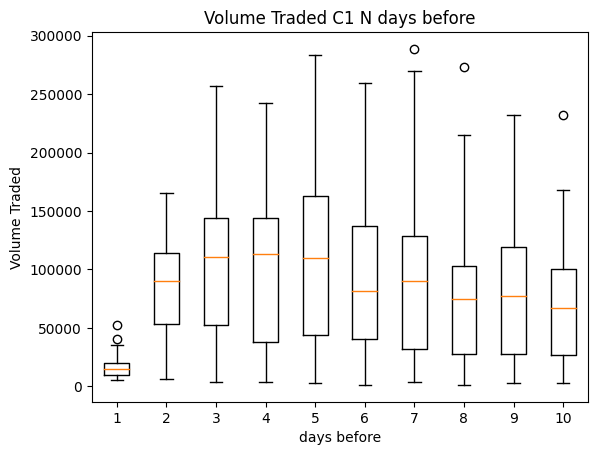

In [19]:
plt.boxplot([list(df.groupby(df.index.date).sum()['Volume']) for df in datasets_by_days])
plt.xticks(range(1, len(business_days_before) + 1), labels = business_days_before)
plt.title("Volume Traded C1 N days before")
plt.xlabel("days before")
plt.ylabel("Volume Traded")

In [20]:
# i = 0
# for df in datasets_by_days:
#     print(f'Q1 {business_days_before[i]} day before: {df["Volume"].describe()["25%"]:.2f}')
#     print(f'Median {business_days_before[i]} day before: {df["Volume"].describe()["50%"]:.2f}')
#     print(f'Q3 {business_days_before[i]} day before: {df["Volume"].describe()["75%"]:.2f}')
#     print(f'mean of {business_days_before[i]} day before: {df["Volume"].describe()["mean"]:.2f}')
    
#     plt.boxplot(df['Volume'], showmeans=True)
    
#     plt.title(f'Boxplot of Specific Day Volumes of {business_days_before[i]} day before')
#     plt.xlabel('Dataset')
#     plt.ylabel('Volume')
    
#     plt.show()
#     i+=1

In [21]:
"""
This section divide the initial dataset into different ones considering days right after relevant dates,
in this case we consider specific days and not all the interval: 
    the first dataset contains all data of first day after relevant dates,
    the second dataset contains all data of second day after relevant dates,
    and so on up to 1 week after.

"""
# business_days_after = [1, 2, 3, 4, 5, 6, 7] 
# datasets_by_days_after = [pd.DataFrame() for i in range(7)]

# for date in relevant_dates:
#     specific_day_dataset = pd.DataFrame()
#     for business_day in range(len(business_days_after)):
#         target_date_day = (pd.to_datetime(date) + pd.offsets.BDay(business_days_after[business_day])).date()
#         specific_day_data = all_data[all_data.index.date == target_date_day]
#         datasets_by_days_after[business_day] = datasets_by_days_after[business_day]._append(specific_day_data)

'\nThis section divide the initial dataset into different ones considering days right after relevant dates,\nin this case we consider specific days and not all the interval: \n    the first dataset contains all data of first day after relevant dates,\n    the second dataset contains all data of second day after relevant dates,\n    and so on up to 1 week after.\n\n'

In [22]:
# i = 0
# for df in datasets_by_days_after:
#     print(f'Q1 {business_days_after[i]} day after: {df["Volume"].describe()["25%"]:.2f}')
#     print(f'Median {business_days_after[i]} day after: {df["Volume"].describe()["50%"]:.2f}')
#     print(f'Q3 {business_days_after[i]} day after: {df["Volume"].describe()["75%"]:.2f}')
#     print(f'mean of {business_days_after[i]} day after: {df["Volume"].describe()["mean"]:.2f}')
    
#     plt.boxplot(df['Volume'], showmeans=True)
    
#     plt.title(f'Boxplot of Specific Day Volumes of {business_days_after[i]} day after')
#     plt.xlabel('Dataset')
#     plt.ylabel('Volume')
    
#     plt.show()
#     i+=1

In [23]:
"""
This section divide the initial dataset into different ones considering days right before relevant dates,
in this case we consider all the interval among two dates: 
    the first dataset contains all data of the last two days before relevant dates,
    the second dataset contains all data of the last week before relevant dates,
    the third dataset contains all data of the last two weeks before relevant dates,
    the fourth dataset contains all data of the last month before relevant dates

"""
datasets_by_days_before_interval = [pd.DataFrame() for i in range(4)]

for date in relevant_dates:
    target_date = pd.to_datetime(date)
    
    # Last two days before the relevant date
    last_two_days = all_data[(all_data.index >= (target_date - pd.Timedelta(days=2))) & (all_data.index < target_date)]
    datasets_by_days_before_interval[0] = datasets_by_days_before_interval[0]._append(last_two_days)
    
    # Last week before the relevant date
    last_week = all_data[(all_data.index >= (target_date - pd.Timedelta(weeks=1))) & (all_data.index < target_date)]
    datasets_by_days_before_interval[1] = datasets_by_days_before_interval[1]._append(last_week)
    
    # Last two weeks before the relevant date
    last_two_weeks = all_data[(all_data.index >= (target_date - pd.Timedelta(weeks=2))) & (all_data.index < target_date)]
    datasets_by_days_before_interval[2] = datasets_by_days_before_interval[2]._append(last_two_weeks)
    
    # Last month before the relevant date
    last_month = all_data[(all_data.index >= (target_date - pd.Timedelta(days=30))) & (all_data.index < target_date)]
    datasets_by_days_before_interval[3] = datasets_by_days_before_interval[3]._append(last_month)

In [24]:
for data in datasets_by_days_before_interval:
    print('----- data -------')
    print(data.head())
    print(data.tail())

""" 
relevant_dates = [
    "2010-03-08", "2010-06-08", "2010-09-08", "2010-12-08",
    "2011-03-08", "2011-06-08", "2011-09-08", "2011-12-08",
    "2012-03-08", "2012-06-07", "2012-09-06", "2012-12-06",
    "2013-03-07", "2013-06-06", "2013-09-06", "2013-12-06",
    "2014-03-06", "2014-06-06", "2014-09-08", "2014-12-08",
    "2015-03-06", "2015-06-08", "2015-09-08", "2015-12-08",
    "2016-03-08", "2016-06-08", "2016-09-08", "2016-12-08",
    "2017-03-08", "2017-06-08", "2017-09-07", "2017-12-07",
    "2018-03-08", "2018-06-07", "2018-09-06", "2018-12-06",
    "2019-03-07", "2019-06-06", "2019-09-06", "2019-12-06",
    "2020-03-06", "2020-06-08", "2020-09-08", "2020-12-08",
    "2021-03-08", "2021-06-08", "2021-09-08", "2021-12-08",
    "2022-03-08", "2022-06-08", "2022-09-08", "2022-12-08",
    "2023-03-08", "2023-06-08", "2023-09-07", "2023-12-07",
]
"""

----- data -------
                            Volume
Date-Time                         
2010-06-07 08:21:21.601127      23
2010-06-07 08:24:39.226321       2
2010-06-07 08:26:50.808239       9
2010-06-07 08:33:05.663304       7
2010-06-07 08:34:22.247494      10
                            Volume
Date-Time                         
2023-06-07 18:06:40.186363       1
2023-06-07 18:20:44.235590       2
2023-06-07 18:40:55.071174       5
2023-06-07 18:41:10.321241       2
2023-06-07 18:48:18.461121      18
----- data -------
                            Volume
Date-Time                         
2010-03-01 08:04:58.641134      10
2010-03-01 08:07:42.225574      45
2010-03-01 08:10:39.411964       3
2010-03-01 08:28:12.309430       1
2010-03-01 08:29:41.312560       1
                            Volume
Date-Time                         
2023-08-31 18:55:59.298322      28
2023-08-31 18:56:49.634197      18
2023-08-31 18:57:17.713820       2
2023-08-31 18:58:33.934043       5
2023-08-31 18:59:

' \nrelevant_dates = [\n    "2010-03-08", "2010-06-08", "2010-09-08", "2010-12-08",\n    "2011-03-08", "2011-06-08", "2011-09-08", "2011-12-08",\n    "2012-03-08", "2012-06-07", "2012-09-06", "2012-12-06",\n    "2013-03-07", "2013-06-06", "2013-09-06", "2013-12-06",\n    "2014-03-06", "2014-06-06", "2014-09-08", "2014-12-08",\n    "2015-03-06", "2015-06-08", "2015-09-08", "2015-12-08",\n    "2016-03-08", "2016-06-08", "2016-09-08", "2016-12-08",\n    "2017-03-08", "2017-06-08", "2017-09-07", "2017-12-07",\n    "2018-03-08", "2018-06-07", "2018-09-06", "2018-12-06",\n    "2019-03-07", "2019-06-06", "2019-09-06", "2019-12-06",\n    "2020-03-06", "2020-06-08", "2020-09-08", "2020-12-08",\n    "2021-03-08", "2021-06-08", "2021-09-08", "2021-12-08",\n    "2022-03-08", "2022-06-08", "2022-09-08", "2022-12-08",\n    "2023-03-08", "2023-06-08", "2023-09-07", "2023-12-07",\n]\n'

Q1 2 days before: 7.00
Median 2 days before: 27.00
Q3 2 days before: 85.00
mean of 2 days before: 90.48


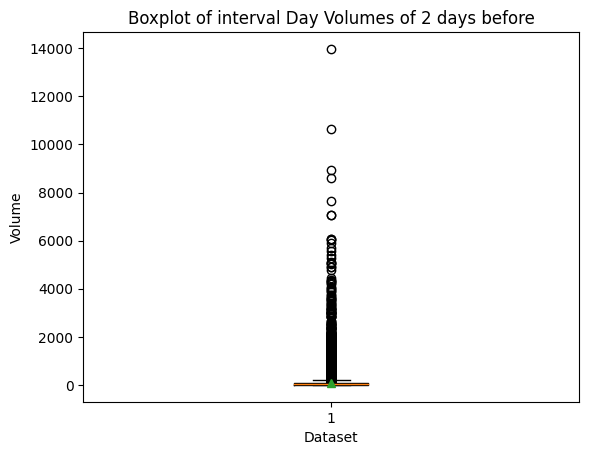

Q1 1 week before: 16.00
Median 1 week before: 59.00
Q3 1 week before: 158.00
mean of 1 week before: 146.92


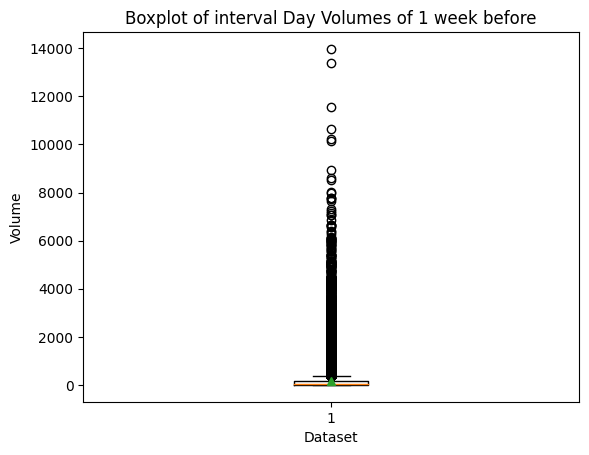

Q1 2 weeks before: 20.00
Median 2 weeks before: 67.00
Q3 2 weeks before: 168.00
mean of 2 weeks before: 146.52


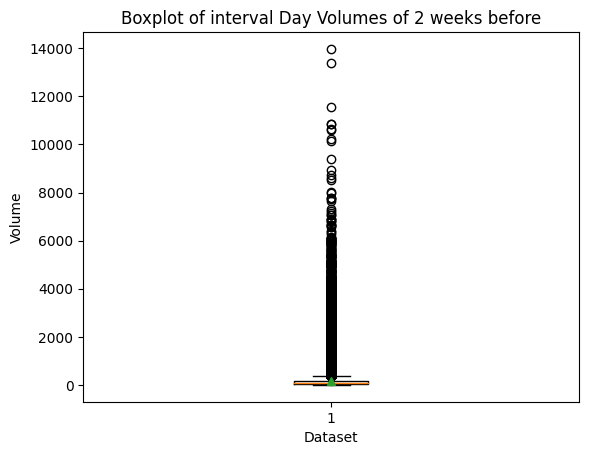

Q1 1 month before: 21.00
Median 1 month before: 68.00
Q3 1 month before: 168.00
mean of 1 month before: 139.88


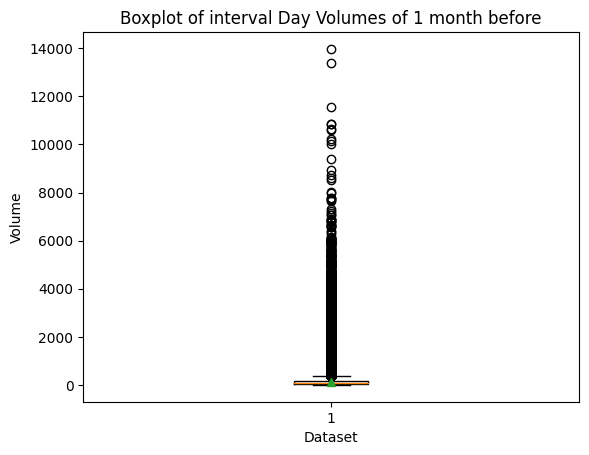

In [25]:
i = 0
legenda = ['2 days','1 week','2 weeks','1 month']
for df in datasets_by_days_before_interval:
    print(f'Q1 {legenda[i]} before: {df["Volume"].describe()["25%"]:.2f}')
    print(f'Median {legenda[i]} before: {df["Volume"].describe()["50%"]:.2f}')
    print(f'Q3 {legenda[i]} before: {df["Volume"].describe()["75%"]:.2f}')
    print(f'mean of {legenda[i]} before: {df["Volume"].describe()["mean"]:.2f}')
    
    plt.boxplot(df['Volume'], showmeans=True)
    
    plt.title(f'Boxplot of interval Day Volumes of {legenda[i]} before')
    plt.xlabel('Dataset')
    plt.ylabel('Volume')
    
    plt.show()
    i+=1

In [26]:
"""
This section divide the initial dataset into different ones considering days right after relevant dates,
in this case we consider all the interval among two dates: 
    the first dataset contains all data of the two days after relevant dates,
    the second dataset contains all data of the first week after relevant dates,
    the third dataset contains all data of the two weeks after relevant dates,
    the fourth dataset contains all data of the month after relevant dates

"""
datasets_by_days_after_interval = [pd.DataFrame() for i in range(4)]

for date in relevant_dates:
    target_date = pd.to_datetime(date)
    
    # Last two days before the relevant date
    last_two_days = all_data[(all_data.index <= (target_date + pd.Timedelta(days=2))) & (all_data.index >= (target_date + pd.Timedelta(days=1)))]
    datasets_by_days_after_interval[0] = datasets_by_days_after_interval[0]._append(last_two_days)
    
    # Last week before the relevant date
    last_week = all_data[(all_data.index <= (target_date + pd.Timedelta(weeks=1))) & (all_data.index >= (target_date + pd.Timedelta(days=1)))]
    datasets_by_days_after_interval[1] = datasets_by_days_after_interval[1]._append(last_week)
    
    # Last two weeks before the relevant date
    last_two_weeks = all_data[(all_data.index <=  (target_date + pd.Timedelta(weeks=2))) & (all_data.index >= (target_date + pd.Timedelta(days=1)))]
    datasets_by_days_after_interval[2] = datasets_by_days_after_interval[2]._append(last_two_weeks)
    
    # Last month before the relevant date
    last_month = all_data[(all_data.index <= (target_date + pd.Timedelta(days=30))) & (all_data.index >= (target_date + pd.Timedelta(days=1)))]
    datasets_by_days_after_interval[3] = datasets_by_days_after_interval[3]._append(last_month)

Q1 2 days after: 25.00
Median 2 days after: 75.00
Q3 2 days after: 172.00
mean of 2 days after: 140.46


Q1 1 week after: 25.00
Median 1 week after: 75.00
Q3 1 week after: 180.00
mean of 1 week after: 144.43


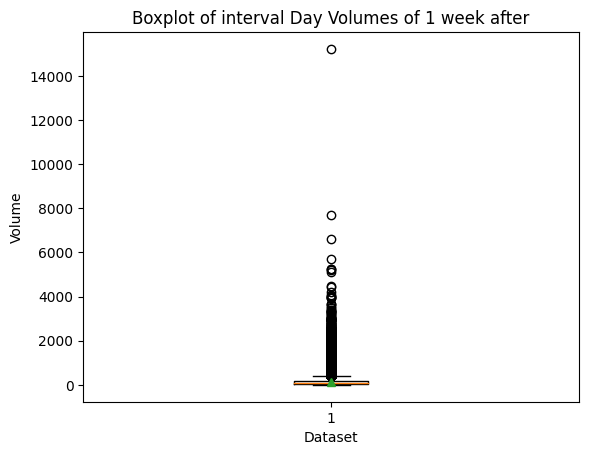

Q1 2 weeks after: 23.00
Median 2 weeks after: 71.00
Q3 2 weeks after: 169.00
mean of 2 weeks after: 135.15


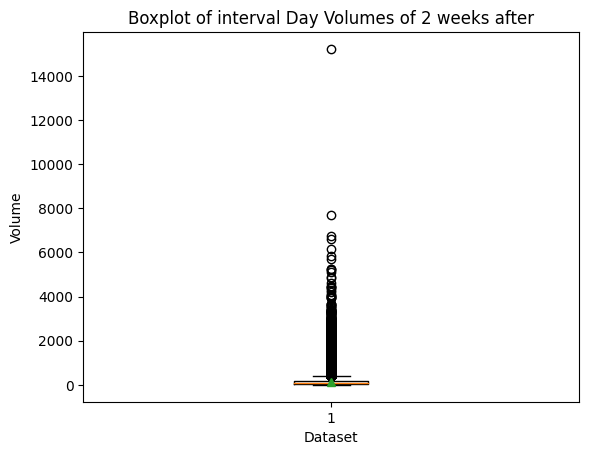

Q1 1 month after: 23.00
Median 1 month after: 69.00
Q3 1 month after: 164.00
mean of 1 month after: 130.38


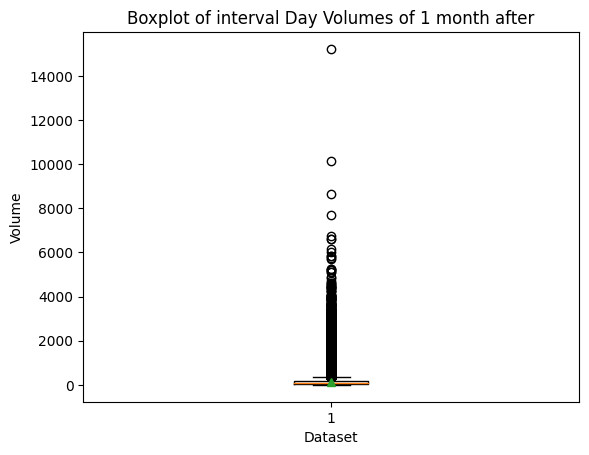

In [27]:
i = 0
legenda = ['2 days','1 week','2 weeks','1 month']
for df in datasets_by_days_after_interval:
    print(f'Q1 {legenda[i]} after: {df["Volume"].describe()["25%"]:.2f}')
    print(f'Median {legenda[i]} after: {df["Volume"].describe()["50%"]:.2f}')
    print(f'Q3 {legenda[i]} after: {df["Volume"].describe()["75%"]:.2f}')
    print(f'mean of {legenda[i]} after: {df["Volume"].describe()["mean"]:.2f}')
    
    plt.boxplot(df['Volume'], showmeans=True)
    
    plt.title(f'Boxplot of interval Day Volumes of {legenda[i]} after')
    plt.xlabel('Dataset')
    plt.ylabel('Volume')
    
    plt.show()
    i+=1

Heatmap

In [28]:
# ------------------------------------------------------------------------------------------

In [38]:
import seaborn as sns
# Load data for all years into a single DataFrame
file_names = [
    f'../../data/IKA_trades_{year}_c1_partial.csv' if year == 2023
    else f'../../data/IKA_trades_{year}_c1.csv'
    for year in range(2010, 2024)
]
anomalous_days = ["2014-05-26", "2015-02-17", "2015-07-20", "2016-07-14", "2018-03-16", "2020-01-22", "2022-08-29", "2023-07-24"]

all_data_c1 = pd.concat([pd.read_csv(file) for file in file_names])
all_data_c1['Date-Time'] = pd.to_datetime(all_data_c1['Date-Time'])
all_data_c1.set_index('Date-Time',inplace=True)
all_data_c1.drop('Price', axis=1,inplace=True)
all_data_c1.shape

for a in anomalous_days:
    all_data_c1 = all_data_c1[all_data_c1.index.date != datetime.strptime(a, "%Y-%m-%d").date()]


In [39]:
# Load data for all years into a single DataFrame
file_names = [
    f'../../data/IKA_trades_{year}_c2_partial.csv' if year == 2023
    else f'../../data/IKA_trades_{year}_c2.csv'
    for year in range(2010, 2024)
]
anomalous_days = ["2014-05-26", "2015-02-17", "2015-07-20", "2016-07-14", "2018-03-16", "2020-01-22", "2022-08-29", "2023-07-24"]

all_data_c2 = pd.concat([pd.read_csv(file) for file in file_names])
all_data_c2['Date-Time'] = pd.to_datetime(all_data_c2['Date-Time'])
all_data_c2.set_index('Date-Time',inplace=True)
all_data_c2.drop('Price', axis=1,inplace=True)
all_data_c2.shape

for a in anomalous_days:
    all_data_c2 = all_data_c2[all_data_c2.index.date != datetime.strptime(a, "%Y-%m-%d").date()]  

In [40]:
pd.read_csv('../../data/IKA_trades_2020_c3.csv')

Date-Time   Price  Volume
0  2020-01-06 15:15:56.893876  140.44       1
1  2020-02-19 13:48:24.467676  147.82       4
2  2020-08-31 11:34:59.765007  144.66    1500
3  2020-08-31 11:35:06.845203  144.67    1500

"2019-03-07", "2019-06-06", "2019-09-06", "2019-12-06",

In [41]:
all_data_c3 = pd.concat([pd.read_csv('../../data/IKA_trades_2019_c3.csv')])
all_data_c3['Date-Time'] = pd.to_datetime(all_data_c3['Date-Time'])
all_data_c3.set_index('Date-Time',inplace=True)
all_data_c3.drop('Price', axis=1,inplace=True)
all_data_c3.shape

for a in anomalous_days:
    all_data_c3 = all_data_c3[all_data_c3.index.date != datetime.strptime(a, "%Y-%m-%d").date()]

The three blocks are related to three assets

In [42]:
all_data_year_c3 = all_data_c3[(all_data_c3.index.date >= datetime.strptime("2019-01-01", "%Y-%m-%d").date()) & (all_data_c3.index.date < datetime.strptime("2019-03-07", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c3 = all_data_year_c3.resample('H').sum() #select interested days and resample the volume to hour
business_days = pd.date_range(start=datetime.strptime("2019-01-01 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-03-06 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c3_a1 = all_data_hourly_sum_c3.reindex(idx, fill_value=0) #add other business days where the volume traded was 0


all_data_year_c2 = all_data_c2[(all_data_c2.index.date >= datetime.strptime("2019-03-07", "%Y-%m-%d").date()) & (all_data_c2.index.date < datetime.strptime("2019-06-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c2_a1 = all_data_year_c2.resample('H').sum()
all_data_hourly_sum_c2_a1 = all_data_hourly_sum_c2_a1[all_data_hourly_sum_c2_a1.Volume > 0] #here the workaround is to select only days with Volume > 0 (thus not added by the resample method)

business_days = pd.date_range(start=datetime.strptime("2019-03-07 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-06-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c2_a1 = all_data_hourly_sum_c2_a1.reindex(idx, fill_value=0) #keep only the business days

# All the block under are the very similar to this one
#-----------


all_data_year_c1 = all_data_c1[(all_data_c1.index.date >= datetime.strptime("2019-06-06", "%Y-%m-%d").date()) & (all_data_c1.index.date < datetime.strptime("2019-09-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c1_a1 = all_data_year_c1.resample('H').sum()
all_data_hourly_sum_c1_a1 = all_data_hourly_sum_c1_a1[all_data_hourly_sum_c1_a1.Volume > 0]

business_days = pd.date_range(start=datetime.strptime("2019-06-06 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-09-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c1_a1 = all_data_hourly_sum_c1_a1.reindex(idx, fill_value=0)

evolution_c3_c2_c1 = pd.concat([all_data_hourly_sum_c3_a1 ,all_data_hourly_sum_c2_a1, all_data_hourly_sum_c1_a1])

#fill
business_days = pd.date_range(start=datetime.strptime("2019-01-01 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2020-03-06 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
evolution_c3_c2_c1 = evolution_c3_c2_c1.reindex(idx)

data_to_show = evolution_c3_c2_c1.pivot_table(index=evolution_c3_c2_c1.index.date, columns=evolution_c3_c2_c1.index.hour, values='Volume', dropna=False)
data_to_show_1 = data_to_show[range(8, 19)]


In [43]:
all_data_year_c3 = all_data_c3[(all_data_c3.index.date >= datetime.strptime("2019-03-07", "%Y-%m-%d").date()) & (all_data_c3.index.date < datetime.strptime("2019-06-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c3 = all_data_year_c3.resample('H').sum()
business_days = pd.date_range(start=datetime.strptime("2019-03-07 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-06-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B')
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c3_a2 = all_data_hourly_sum_c3.reindex(idx, fill_value=0)

all_data_year_c2 = all_data_c2[(all_data_c2.index.date >= datetime.strptime("2019-06-06", "%Y-%m-%d").date()) & (all_data_c2.index.date < datetime.strptime("2019-09-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c2_a2 = all_data_year_c2.resample('H').sum()
all_data_hourly_sum_c2_a2 = all_data_hourly_sum_c2_a2[all_data_hourly_sum_c2_a2.Volume > 0]

business_days = pd.date_range(start=datetime.strptime("2019-06-06 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-09-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c2_a2 = all_data_hourly_sum_c2_a2.reindex(idx, fill_value=0)

all_data_year_c1 = all_data_c1[(all_data_c1.index.date >= datetime.strptime("2019-09-06", "%Y-%m-%d").date()) & (all_data_c1.index.date < datetime.strptime("2019-12-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c1_a2 = all_data_year_c1.resample('H').sum()
all_data_hourly_sum_c1_a2 = all_data_hourly_sum_c1_a2[all_data_hourly_sum_c1_a2.Volume > 0]

business_days = pd.date_range(start=datetime.strptime("2019-09-06 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-12-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c1_a2 = all_data_hourly_sum_c1_a2.reindex(idx, fill_value=0)


evolution_c3_c2_c1 = pd.concat([all_data_hourly_sum_c3_a2,all_data_hourly_sum_c2_a2, all_data_hourly_sum_c1_a2])

#fill
business_days = pd.date_range(start=datetime.strptime("2019-01-01 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2020-03-06 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B')
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
evolution_c3_c2_c1 = evolution_c3_c2_c1.reindex(idx)

data_to_show = evolution_c3_c2_c1.pivot_table(index=evolution_c3_c2_c1.index.date, columns=evolution_c3_c2_c1.index.hour, values='Volume', dropna=False)
data_to_show_2 = data_to_show[range(8, 19)]

/var/folders/g8/qtlwz6rd2ql_k8xch114s0_w0000gn/T/ipykernel_6881/2021151205.py:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0, 0])


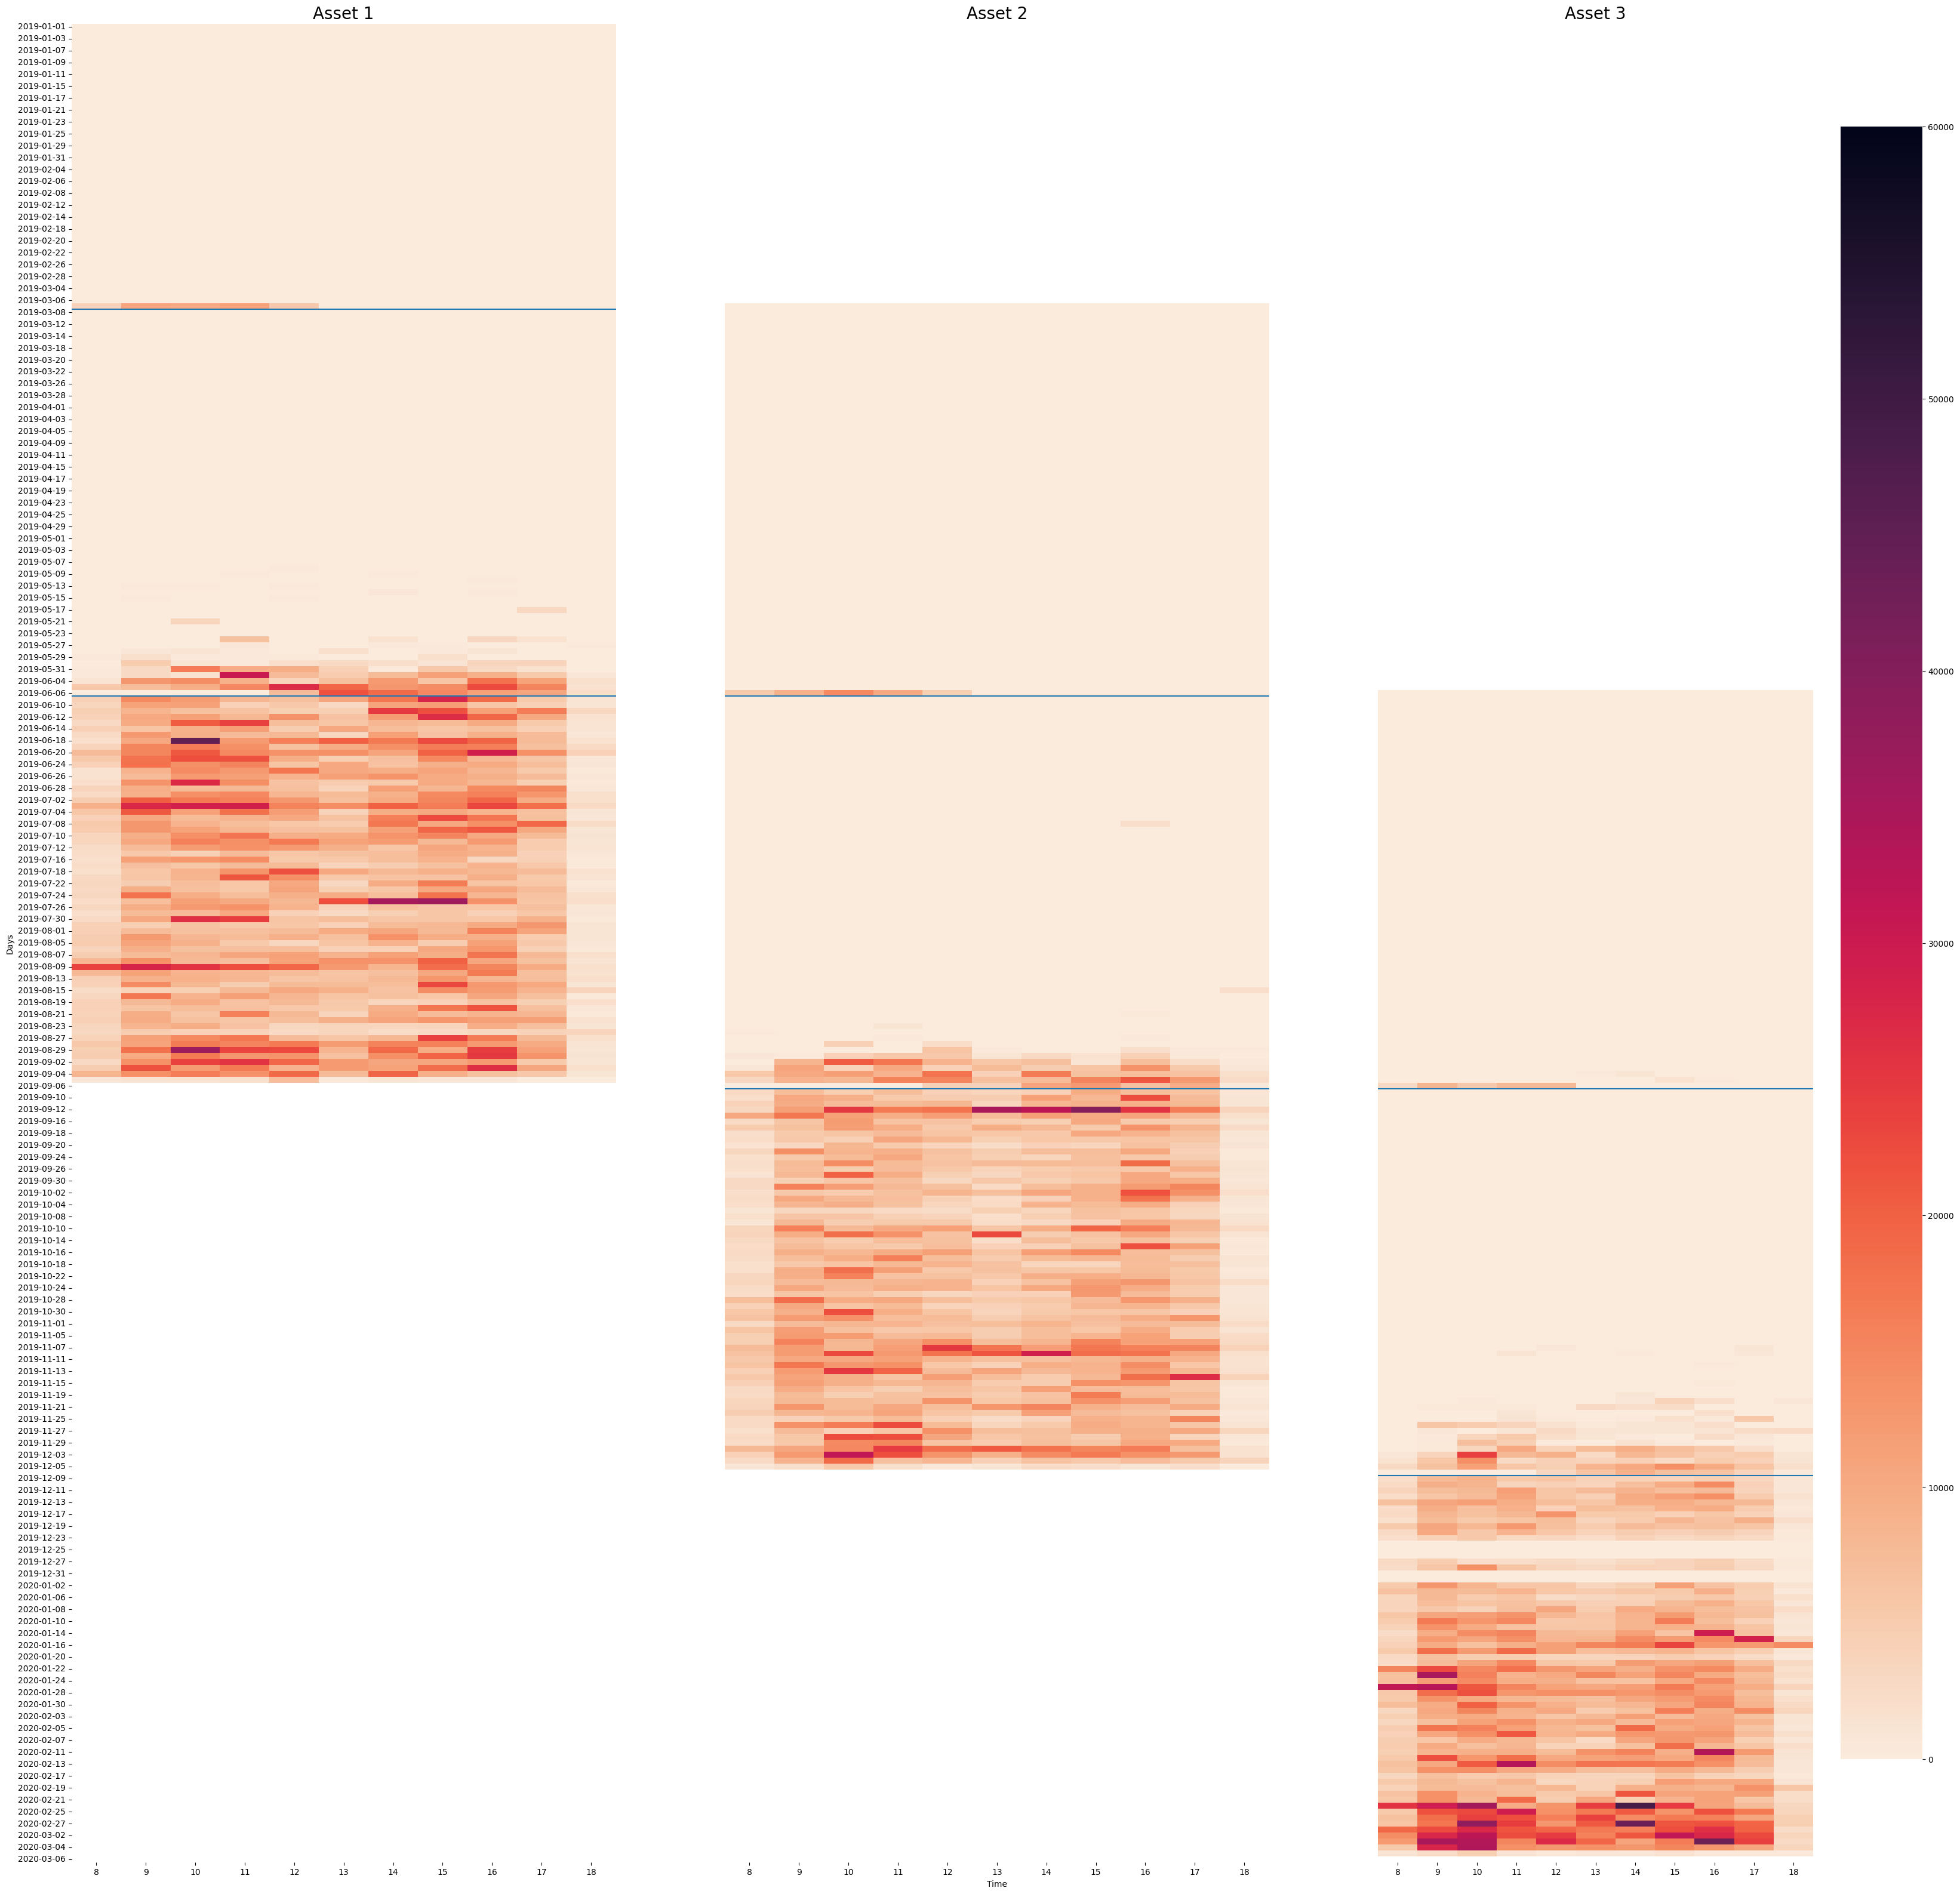

In [44]:
from matplotlib.pyplot import GridSpec
#Read next year for residual days
all_data_c1_pt_2 = pd.read_csv('../../data/IKA_trades_2020_c1.csv')
all_data_c1_pt_2['Date-Time'] = pd.to_datetime(all_data_c1_pt_2['Date-Time'])
all_data_c1_pt_2.set_index('Date-Time',inplace=True)
all_data_c1_pt_2.drop('Price', axis=1,inplace=True)

all_data_year_c3 = all_data_c3[(all_data_c3.index.date >= datetime.strptime("2019-06-06", "%Y-%m-%d").date()) & (all_data_c3.index.date < datetime.strptime("2019-09-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c3 = all_data_year_c3.resample('H').sum()
business_days = pd.date_range(start=datetime.strptime("2019-06-06 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-09-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B')
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c3_a3 = all_data_hourly_sum_c3.reindex(idx, fill_value=0)

all_data_year_c2 = all_data_c2[(all_data_c2.index.date >= datetime.strptime("2019-09-06", "%Y-%m-%d").date()) & (all_data_c2.index.date < datetime.strptime("2019-12-06", "%Y-%m-%d").date()) ]
all_data_hourly_sum_c2_a3 = all_data_year_c2.resample('H').sum()
all_data_hourly_sum_c2_a3 = all_data_hourly_sum_c2_a3[all_data_hourly_sum_c2_a3.Volume > 0]

business_days = pd.date_range(start=datetime.strptime("2019-09-06 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2019-12-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c2_a3 = all_data_hourly_sum_c2_a3.reindex(idx, fill_value=0)

all_data_year_c1 = all_data_c1[(all_data_c1.index.date >= datetime.strptime("2019-12-06", "%Y-%m-%d").date()) & (all_data_c1.index.date <= datetime.strptime("2019-12-31", "%Y-%m-%d").date())]
all_data_year_c1_p2 = all_data_c1_pt_2[(all_data_c1_pt_2.index.date < datetime.strptime("2020-03-06", "%Y-%m-%d").date())]
all_data_year_c1 = pd.concat([all_data_year_c1, all_data_year_c1_p2 ])
all_data_hourly_sum_c1_a3 = all_data_year_c1.resample('H').sum()
all_data_hourly_sum_c1_a3 = all_data_hourly_sum_c1_a3[all_data_hourly_sum_c1_a3.Volume > 0]

business_days = pd.date_range(start=datetime.strptime("2019-12-06 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2020-03-05 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B', inclusive="both")
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
all_data_hourly_sum_c1_a3 = all_data_hourly_sum_c1_a3.reindex(idx, fill_value=0)

evolution_c3_c2_c1 = pd.concat([all_data_hourly_sum_c3_a3,all_data_hourly_sum_c2_a3, all_data_hourly_sum_c1_a3])

#fill
business_days = pd.date_range(start=datetime.strptime("2019-01-01 08:00:00", "%Y-%m-%d %H:%M:%S"), end=datetime.strptime("2020-03-06 19:00:00", "%Y-%m-%d %H:%M:%S"), freq='B')
my_list = [pd.date_range(start=f'{day} 08:00', end=f'{day} 19:00', freq='H') for day in business_days]
idx = my_list[0]
for e in my_list[1:]:
    idx = idx.union(e)
evolution_c3_c2_c1 = evolution_c3_c2_c1.reindex(idx)

data_to_show = evolution_c3_c2_c1.pivot_table(index=evolution_c3_c2_c1.index.date, columns=evolution_c3_c2_c1.index.hour, values='Volume', dropna=False )
data_to_show_3 = data_to_show[range(8, 19)]


plt.figure(figsize=(40,40))
plt.title("2019 Traded Volume")
gs = GridSpec(1, 3)

# Create subplots using the grid
ax1 = plt.subplot(gs[0, 0])
ax1.title.set_text('Asset 1')
ax1.title.set_size(20)
ax2 = plt.subplot(gs[0, 1])
ax2.title.set_text('Asset 2')
ax2.title.set_size(20)
ax3 = plt.subplot(gs[0, 2])
ax3.title.set_text('Asset 3')
ax3.title.set_size(20)



sns.heatmap(ax=ax1, data=data_to_show_1, annot=False, cmap = "rocket_r", vmax = 60000, cbar=False)
sns.heatmap(ax=ax2, data=data_to_show_2, annot=False, cmap = "rocket_r", vmax = 60000, cbar=False, yticklabels=False)
sns.heatmap(ax=ax3, data=data_to_show_3, annot=False, cmap = "rocket_r", vmax = 60000, yticklabels=False)
ax1.hlines([np.unique(all_data_hourly_sum_c3_a1.index.date).shape[0]+1, np.unique(all_data_hourly_sum_c2_a1.index.date).shape[0] + np.unique(all_data_hourly_sum_c3_a1.index.date).shape[0] + 1], *ax1.get_xlim())
ax1.set_ylabel("Days")
ax2.hlines([np.unique(all_data_hourly_sum_c3_a1.index.date).shape[0]+ np.unique(all_data_hourly_sum_c3_a2.index.date).shape[0]+1, np.unique(all_data_hourly_sum_c3_a1.index.date).shape[0] + np.unique(all_data_hourly_sum_c2_a2.index.date).shape[0] + np.unique(all_data_hourly_sum_c3_a2.index.date).shape[0] + 1], *ax2.get_xlim())
ax3.hlines([np.unique(all_data_hourly_sum_c3_a1.index.date).shape[0]+ np.unique(all_data_hourly_sum_c3_a2.index.date).shape[0]+ np.unique(all_data_hourly_sum_c3_a3.index.date).shape[0]+1, np.unique(all_data_hourly_sum_c3_a1.index.date).shape[0]+ np.unique(all_data_hourly_sum_c3_a2.index.date).shape[0] + np.unique(all_data_hourly_sum_c2_a3.index.date).shape[0] + np.unique(all_data_hourly_sum_c3_a3.index.date).shape[0] + 1], *ax3.get_xlim())
ax2.set_xlabel("Time")
plt.show()

/Users/giovannidispoto/miniforge3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
15:55:03 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:05 - cmdstanpy - INFO - Chain [1] done processing
15:55:05 - cmdstanpy - INFO - Chain [1] start processing
15:55:05 - cmdstanpy - INFO - Chain [1] done processing
15:55:05 - cmdstanpy - INFO - Chain [1] start

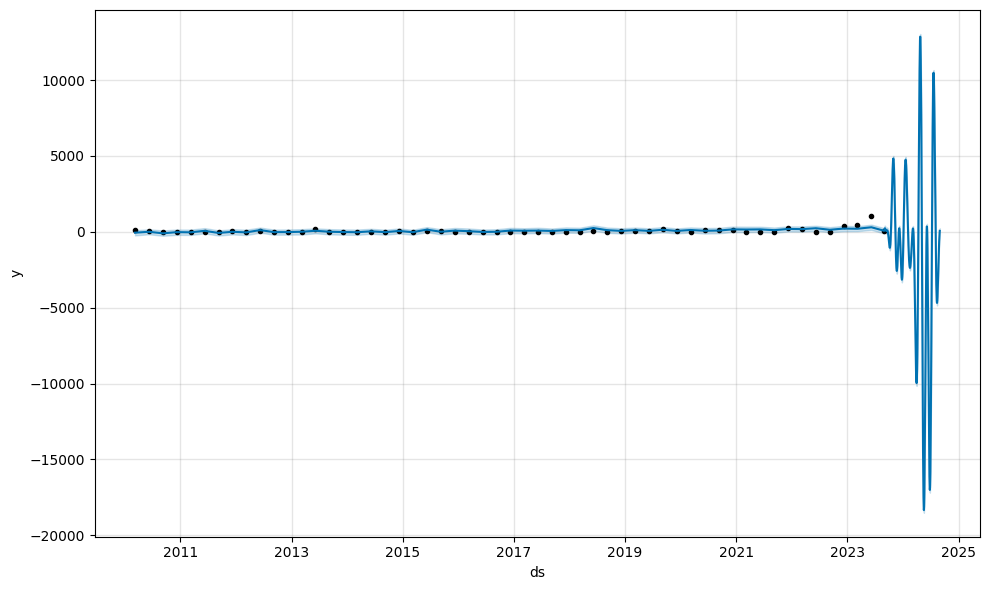

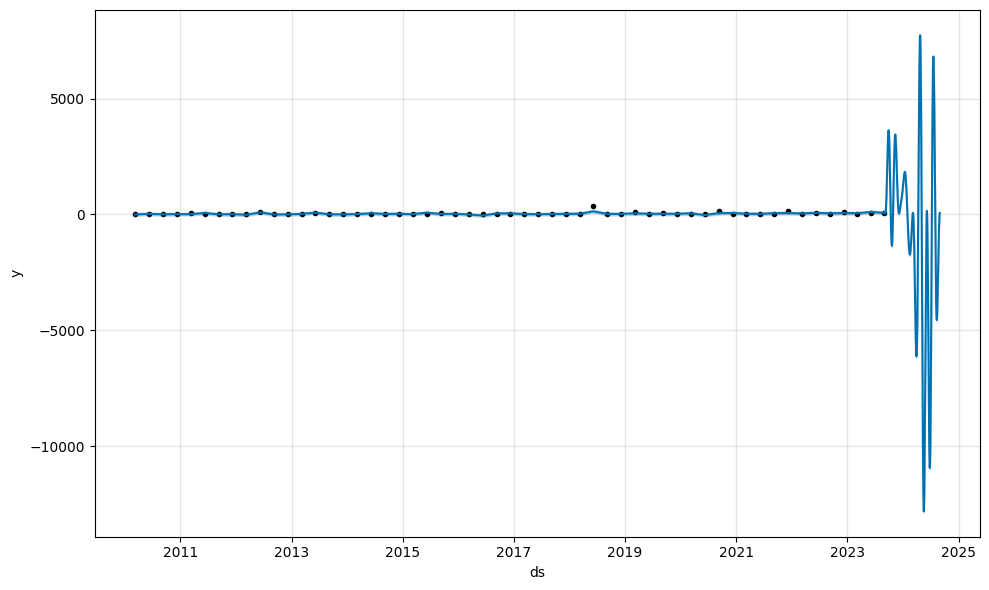

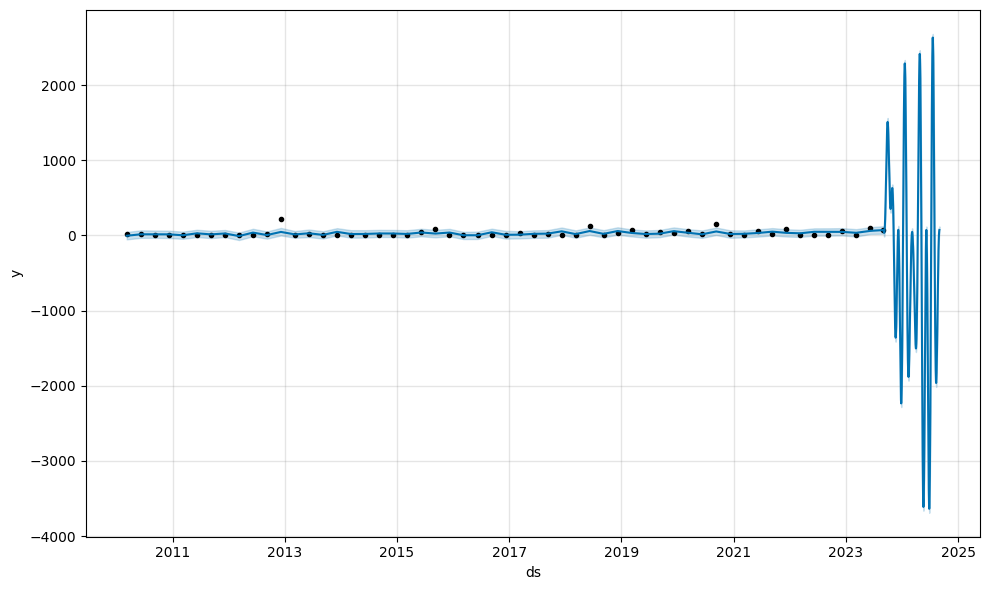

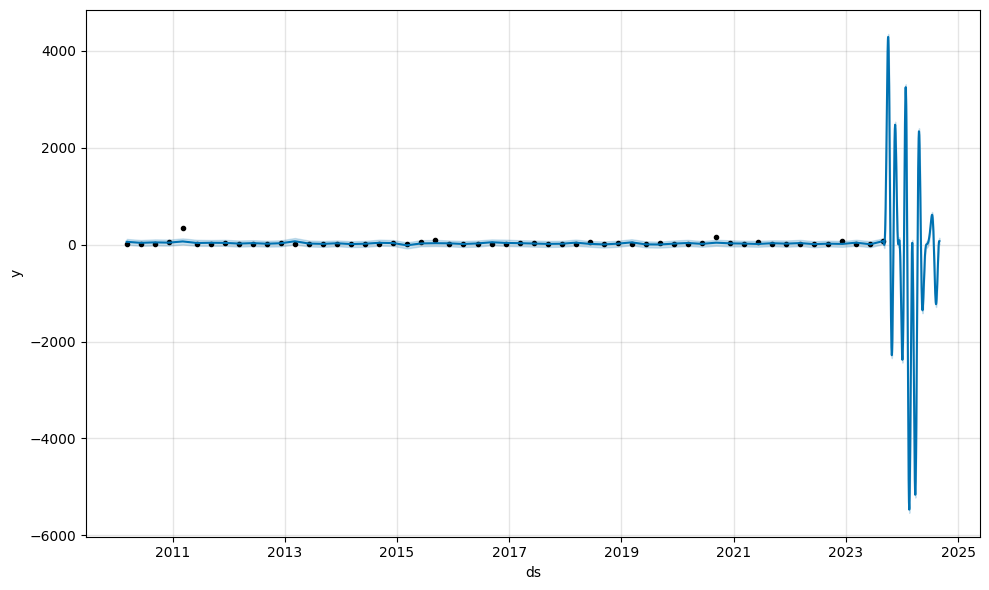

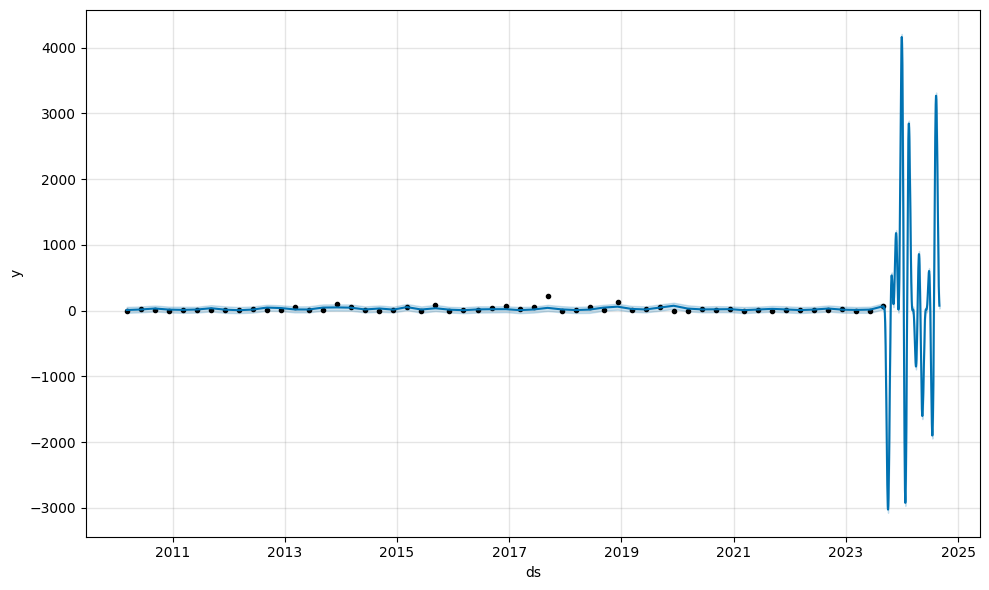

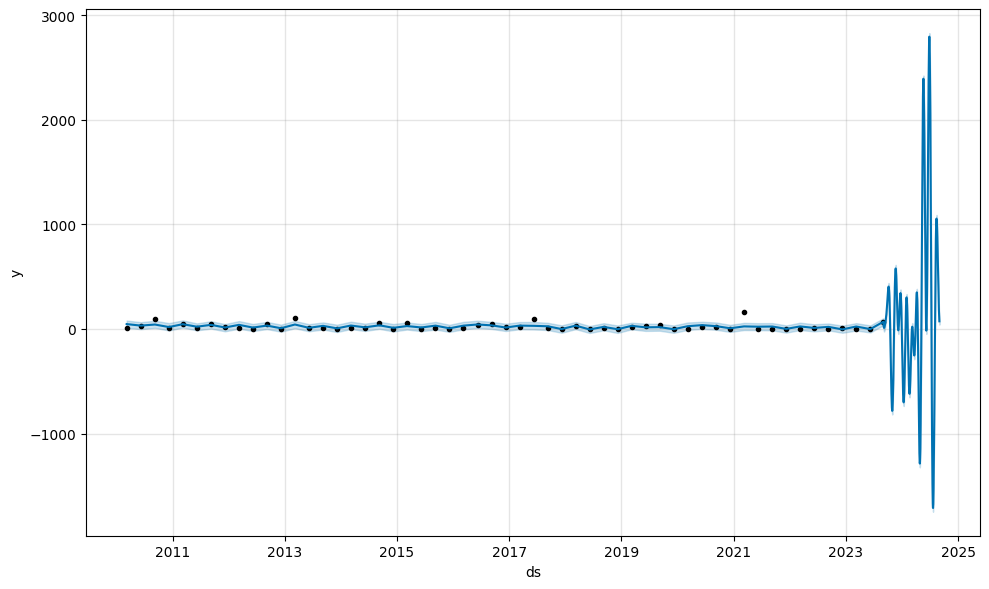

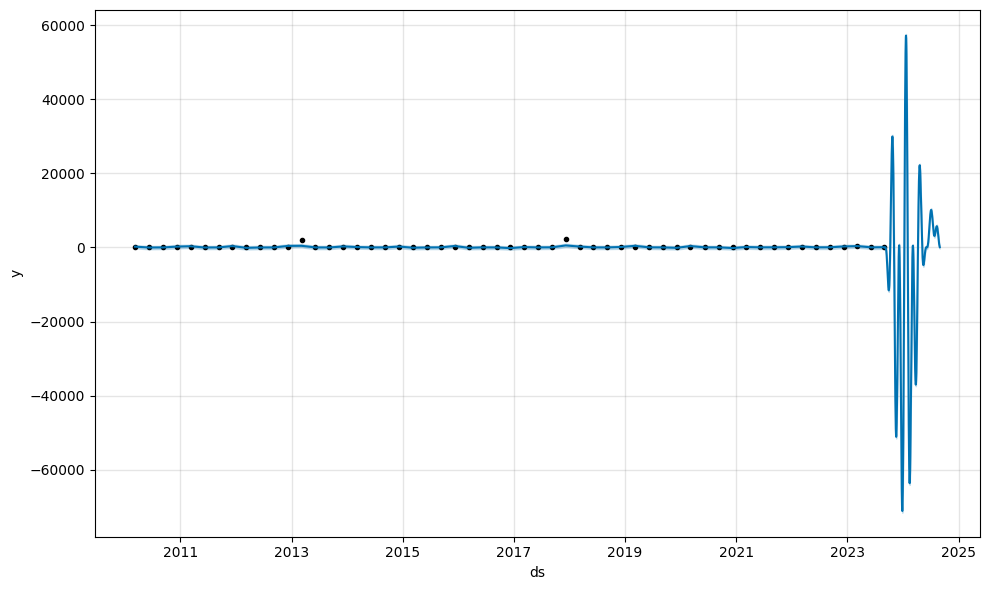

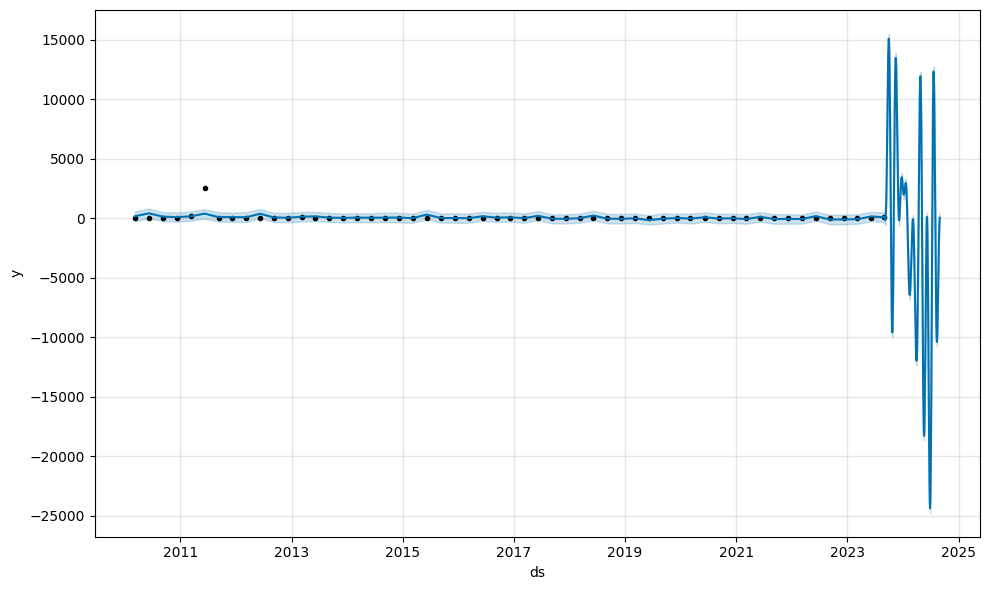

In [45]:
from prophet import Prophet
time_intervals = [1,2,5,10,30,60,120,240]
i = 0
for df in df_by_interval:
    df['ds'] = df.index
    df.reset_index(drop=True,inplace=True)
    df.rename(columns={'Volume': 'y'}, inplace=True)
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    fig1 = m.plot(forecast)